## Merge of data sources (aid data and financal data)

In [3]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

### KPIs

In [336]:
KPIs = pd.read_csv('data/main/company_KPIs.csv')
KPIs = KPIs.loc[KPIs['year'] >= 2018]
KPIs.drop_duplicates(keep='first', inplace=True)

In [337]:
KPIs = KPIs.drop(columns = ['accruals', 'deferrals','inventories','fixed_assets'])

In [338]:
KPIs['company'] = KPIs['company'].str.lower()
KPIs['name_matching'] = KPIs['name_matching'].str.lower()

In [339]:
KPIs

,company,name_matching,period_start,period_end,assets,equity,liabilities,current_liabilities,current_assets,cash,current_ratio,qick_ratio,cash_ratio,debt2equity_ratio,debt2asset_ratio,equity_ratio,year
0,t.u.r. hotel am rothenbaum gmbh,t.u.r. hotel am rothenbaum gmbh,01.04.2020,31.03.2021,731671.83,472267.61,199582.31,10582.31,661589.35,163695.25,62.518425,62.518425,0.223728,0.422604,0.272776,0.645464,2021
1,t.u.r. hotel am rothenbaum gmbh,t.u.r. hotel am rothenbaum gmbh,01.04.2019,31.03.2020,512694.02,446790.84,25063.84,25063.84,425861.02,37486.08,16.991052,16.991052,0.073116,0.056097,0.048887,0.871457,2020
2,t.u.r. hotel am rothenbaum gmbh,t.u.r. hotel am rothenbaum gmbh,01.04.2018,31.03.2019,434079.56,393640.05,26543.09,26543.09,332652.56,13961.45,12.532548,12.526257,0.032163,0.067430,0.061148,0.906838,2019
3,t.u.r. hotel am rothenbaum gmbh,t.u.r. hotel am rothenbaum gmbh,01.04.2017,31.03.2018,406658.13,344784.27,36393.06,36393.06,287087.13,28753.53,7.888513,7.882468,0.070707,0.105553,0.089493,0.847848,2018
4,gh grundinvest hessen gmbh,gh grundinvest hessen gmbh,01.01.2020,31.12.2020,2416778.57,192314.61,2013733.96,2013733.96,2372455.57,97459.91,1.178138,0.670834,0.040326,10.471040,0.833231,0.079575,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83315,bühnenverleih frank von wysocki gmbh,bühnenverleih frank von wysocki gmbh,01.01.2019,31.12.2019,2515793.44,1703326.15,82357.55,82357.55,2362319.21,676458.55,28.683699,28.681878,0.268885,0.048351,0.032736,0.677053,2019
83316,bühnenverleih frank von wysocki gmbh,bühnenverleih frank von wysocki gmbh,01.01.2018,31.12.2018,2090897.01,1428419.92,100574.21,100574.21,1917136.20,487850.59,19.061907,19.061907,0.233321,0.070409,0.048101,0.683161,2018
83318,gallissas theaterverlag und mediaagentur gmbh,gallissas theaterverlag und mediaagentur gmbh,01.01.2021,31.12.2021,3261572.98,733746.39,2484931.70,1585649.56,2819122.48,645699.32,1.777898,1.774889,0.197972,3.386636,0.761881,0.224967,2021
83319,gallissas theaterverlag und mediaagentur gmbh,gallissas theaterverlag und mediaagentur gmbh,01.01.2020,31.12.2020,3067134.74,699191.11,2356543.63,1424565.68,2607247.66,619224.85,1.830205,1.826857,0.201890,3.370386,0.768321,0.227962,2020


In [340]:
# Drop non fiscal year if different from calendar year
KPIs["cut_off"] = pd.to_datetime(KPIs["period_end"], infer_datetime_format=True).dt.month
KPIs = KPIs[KPIs["cut_off"]==12] # Fiscal year ending in december (like calendar year) (to ensure, that aid payment will be correctly matched with reporting periode)
KPIs

,company,name_matching,period_start,period_end,assets,equity,liabilities,current_liabilities,current_assets,cash,current_ratio,qick_ratio,cash_ratio,debt2equity_ratio,debt2asset_ratio,equity_ratio,year,cut_off
4,gh grundinvest hessen gmbh,gh grundinvest hessen gmbh,01.01.2020,31.12.2020,2416778.57,192314.61,2013733.96,2013733.96,2372455.57,97459.91,1.178138,0.670834,0.040326,10.471040,0.833231,0.079575,2020,12
5,gh grundinvest hessen gmbh,gh grundinvest hessen gmbh,01.01.2019,31.12.2019,2157298.95,60730.99,1927967.96,1927967.96,2095163.40,6859.87,1.086721,0.567971,0.003180,31.746032,0.893695,0.028151,2019,12
6,gh grundinvest hessen gmbh,gh grundinvest hessen gmbh,01.01.2018,31.12.2018,1121777.06,0.00,1051340.31,1051340.31,1090643.56,2004.25,1.037384,1.037384,0.001787,inf,0.937210,0.000000,2018,12
11,car-service richter gmbh,car-service richter gmbh,01.01.2020,31.12.2020,552956.54,0.00,541674.54,541674.54,371398.38,41994.74,0.685649,0.181410,0.075946,inf,0.979597,0.000000,2020,12
12,car-service richter gmbh,car-service richter gmbh,01.01.2019,31.12.2019,526188.85,31596.59,485548.27,485548.27,358462.12,2746.47,0.738263,0.163135,0.005220,15.367110,0.922764,0.060048,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83315,bühnenverleih frank von wysocki gmbh,bühnenverleih frank von wysocki gmbh,01.01.2019,31.12.2019,2515793.44,1703326.15,82357.55,82357.55,2362319.21,676458.55,28.683699,28.681878,0.268885,0.048351,0.032736,0.677053,2019,12
83316,bühnenverleih frank von wysocki gmbh,bühnenverleih frank von wysocki gmbh,01.01.2018,31.12.2018,2090897.01,1428419.92,100574.21,100574.21,1917136.20,487850.59,19.061907,19.061907,0.233321,0.070409,0.048101,0.683161,2018,12
83318,gallissas theaterverlag und mediaagentur gmbh,gallissas theaterverlag und mediaagentur gmbh,01.01.2021,31.12.2021,3261572.98,733746.39,2484931.70,1585649.56,2819122.48,645699.32,1.777898,1.774889,0.197972,3.386636,0.761881,0.224967,2021,12
83319,gallissas theaterverlag und mediaagentur gmbh,gallissas theaterverlag und mediaagentur gmbh,01.01.2020,31.12.2020,3067134.74,699191.11,2356543.63,1424565.68,2607247.66,619224.85,1.830205,1.826857,0.201890,3.370386,0.768321,0.227962,2020,12


In [341]:
KPIs_wide = KPIs
KPIs_wide = KPIs_wide.drop('name_matching', axis=1)
KPIs_wide = KPIs_wide.drop('cut_off', axis=1)
KPIs_wide = KPIs_wide.drop('period_start', axis=1)
KPIs_wide = KPIs_wide.drop('period_end', axis=1)
KPIs_wide =  KPIs_wide.pivot_table(index="company", columns="year", aggfunc='first')
KPIs_wide.columns = KPIs_wide.columns.map(lambda x: f'{x[0]}_{x[1]}')
KPIs_wide.reset_index()


,company,assets_2018,assets_2019,assets_2020,assets_2021,cash_2018,cash_2019,cash_2020,cash_2021,cash_ratio_2018,...,equity_ratio_2020,equity_ratio_2021,liabilities_2018,liabilities_2019,liabilities_2020,liabilities_2021,qick_ratio_2018,qick_ratio_2019,qick_ratio_2020,qick_ratio_2021
0,"""capillar gmbh""",2332299.34,NaN,2732777.71,NaN,36787.77,NaN,233693.31,NaN,0.015773,...,0.259127,NaN,1907952.22,NaN,1996968.98,NaN,0.561763,NaN,1.356299,NaN
1,"""cedon"" museumshops gmbh",3346436.46,2994454.78,2953545.57,3315576.89,340951.70,108592.96,356456.98,1094518.85,0.101885,...,0.331118,0.376323,1990886.76,1782900.01,1937804.31,2019107.59,0.529225,0.381719,1.507892,2.071978
2,"""der pommeraner"" loitz gmbh",5241088.11,NaN,NaN,NaN,25251.79,NaN,NaN,NaN,0.004818,...,NaN,NaN,4762714.82,NaN,NaN,NaN,0.481459,NaN,NaN,NaN
3,"""die rakete"" gastro gmbh",311863.65,389901.91,459210.13,NaN,35438.24,46393.64,74102.15,NaN,0.113634,...,0.036228,NaN,302658.12,281084.21,357494.81,NaN,0.770314,0.954699,4.643387,NaN
4,"""ecoma"" maschinen gmbh",1640573.82,1379945.74,1687367.43,3296575.74,5483.10,229.43,325.42,583.88,0.003342,...,0.000000,0.000000,1597409.70,1305483.28,1648004.43,3250637.74,0.527999,0.635738,0.231484,0.227806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23500,überfluss hotelbetriebsgesellschaft mbh,441526.70,713805.80,1710810.39,NaN,41873.61,215332.33,222075.27,NaN,0.094838,...,0.000000,NaN,298772.15,660530.66,1512810.39,NaN,2.625156,2.951252,5.766044,NaN
23501,überland reisen berlin gmbh,NaN,370426.25,615684.63,NaN,NaN,258708.54,581672.91,NaN,NaN,...,0.486173,NaN,NaN,218803.66,184856.97,NaN,NaN,1.582294,3.298590,NaN
23502,überland tecklenburg gmbh,227316.84,NaN,NaN,562872.20,116063.87,NaN,NaN,505964.12,0.510582,...,NaN,0.559131,115957.68,NaN,NaN,27608.62,1.356447,NaN,NaN,19.481198
23503,überquell gmbh,2171411.66,1976323.34,1701928.23,NaN,91847.77,9972.35,1537.64,NaN,0.042299,...,0.000000,NaN,1775895.88,1692158.61,1458755.91,NaN,0.232738,0.090197,0.492466,NaN


### Aid Data

In [402]:
aid_data = pd.read_csv('data/main/all_companies.csv')  
aid_data = aid_data[["Name des Beihilfeempfängers",
    "Art des Beihilfeempfängers","Tag der Gewährung", 
    "Wirtschaftszweig (NACE)", 
    "Beihilfeelement, in voller Höhe", 
    "Nominalbetrag" ,
    "Beihilfeinstrument"]]
aid_data["Jahr der Gewährung"] = pd.to_datetime(aid_data["Tag der Gewährung"], infer_datetime_format=True).dt.strftime('%Y').astype(int)
aid_data["Tag der Gewährung"] = pd.to_datetime(aid_data["Tag der Gewährung"], infer_datetime_format=True)
#aid_data.rename(columns={"Tag der Gewährung": "Jahr der Gewährung"}, inplace=True)

aid_data['absorption_days'] = (( aid_data["Tag der Gewährung"] + pd.offsets.YearEnd() ) - aid_data["Tag der Gewährung"] ).dt.days

aid_data['Name des Beihilfeempfängers'] = aid_data['Name des Beihilfeempfängers'].str.lower()
aid_data

/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_56963/1817495665.py:1: DtypeWarning: Columns (13,23) have mixed types. Specify dtype option on import or set low_memory=False.
  aid_data = pd.read_csv('data/main/all_companies.csv')


,Name des Beihilfeempfängers,Art des Beihilfeempfängers,Tag der Gewährung,Wirtschaftszweig (NACE),"Beihilfeelement, in voller Höhe",Nominalbetrag,Beihilfeinstrument,Jahr der Gewährung,absorption_days
0,eurocaribe druck und verlag gnbh,Kleine und mittlere Unternehmen,2020-08-26,Herstellung von Druckerzeugnissen,126350.0,NaN,Sonstiges (bitte angeben),2020,127
1,k-motion gmbh & co. kg,Kleine und mittlere Unternehmen,2020-08-24,Kinos,150000.0,NaN,Sonstiges (bitte angeben),2020,129
2,künstlermanagement uwe kanthak,Kleine und mittlere Unternehmen,2020-08-14,"Kreative, künstlerische und unterhaltende Täti...",141904.0,NaN,Sonstiges (bitte angeben),2020,139
3,do it! sprachreisen ohg,Kleine und mittlere Unternehmen,2020-08-03,Reiseveranstalter,107526.0,NaN,Sonstiges (bitte angeben),2020,150
4,hck holding gmbh,Kleine und mittlere Unternehmen,2020-08-19,Event-Caterer,150000.0,NaN,Sonstiges (bitte angeben),2020,134
...,...,...,...,...,...,...,...,...,...
135473,milchproduktion kreinitz gmbh,Kleine und mittlere Unternehmen,2020-05-15,Haltung von Milchkühen,315000.0,315000.0,Bürgschaft,2020,230
135474,jürgen schirra,Kleine und mittlere Unternehmen,2020-05-27,Gemischte Landwirtschaft,67500.0,67500.0,Bürgschaft,2020,218
135475,milchproduktion wildenborn kg,Kleine und mittlere Unternehmen,2020-05-15,Haltung von Milchkühen,180000.0,180000.0,Bürgschaft,2020,230
135476,a) weingut bergdolt-reif & nett gmbh&co.kg,Kleine und mittlere Unternehmen,2020-05-20,Anbau von Wein- und Tafeltrauben,405000.0,405000.0,Bürgschaft,2020,225


In [403]:
# Replace wrong company names
aid_data = aid_data.merge(KPIs[['name_matching', 'company']], 
                how='left', 
                left_on='Name des Beihilfeempfängers', 
                right_on='name_matching')

aid_data['Name des Beihilfeempfängers'] = np.where(aid_data['company'].isna() , aid_data['Name des Beihilfeempfängers'], aid_data['company'])

aid_data = aid_data.drop(columns = ['name_matching', 'company', 'Tag der Gewährung'])
aid_data.drop_duplicates(keep='first', inplace=True)
aid_data

,Name des Beihilfeempfängers,Art des Beihilfeempfängers,Wirtschaftszweig (NACE),"Beihilfeelement, in voller Höhe",Nominalbetrag,Beihilfeinstrument,Jahr der Gewährung,absorption_days
0,eurocaribe druck und verlag gnbh,Kleine und mittlere Unternehmen,Herstellung von Druckerzeugnissen,126350.0,NaN,Sonstiges (bitte angeben),2020,127
1,k-motion gmbh & co. kg,Kleine und mittlere Unternehmen,Kinos,150000.0,NaN,Sonstiges (bitte angeben),2020,129
2,künstlermanagement uwe kanthak,Kleine und mittlere Unternehmen,"Kreative, künstlerische und unterhaltende Täti...",141904.0,NaN,Sonstiges (bitte angeben),2020,139
3,do it! sprachreisen ohg,Kleine und mittlere Unternehmen,Reiseveranstalter,107526.0,NaN,Sonstiges (bitte angeben),2020,150
4,hck holding gmbh,Kleine und mittlere Unternehmen,Event-Caterer,150000.0,NaN,Sonstiges (bitte angeben),2020,134
...,...,...,...,...,...,...,...,...
219786,milchproduktion kreinitz gmbh,Kleine und mittlere Unternehmen,Haltung von Milchkühen,315000.0,315000.0,Bürgschaft,2020,230
219789,jürgen schirra,Kleine und mittlere Unternehmen,Gemischte Landwirtschaft,67500.0,67500.0,Bürgschaft,2020,218
219790,milchproduktion wildenborn kg,Kleine und mittlere Unternehmen,Haltung von Milchkühen,180000.0,180000.0,Bürgschaft,2020,230
219791,a) weingut bergdolt-reif & nett gmbh&co.kg,Kleine und mittlere Unternehmen,Anbau von Wein- und Tafeltrauben,405000.0,405000.0,Bürgschaft,2020,225


In [404]:
# Rename columns
aid_data = aid_data.rename(columns={'Name des Beihilfeempfängers' : 'company', 
                                        'Art des Beihilfeempfängers' : 'size',
                                        'Jahr der Gewährung' : 'year',
                                        'Wirtschaftszweig (NACE)' : 'industry',
                                        'Beihilfeelement, in voller Höhe' : 'amount',
                                        'Nominalbetrag' : 'amount_nom',
                                        'Beihilfeinstrument' : 'instrument',
                                        })
aid_data

,company,size,industry,amount,amount_nom,instrument,year,absorption_days
0,eurocaribe druck und verlag gnbh,Kleine und mittlere Unternehmen,Herstellung von Druckerzeugnissen,126350.0,NaN,Sonstiges (bitte angeben),2020,127
1,k-motion gmbh & co. kg,Kleine und mittlere Unternehmen,Kinos,150000.0,NaN,Sonstiges (bitte angeben),2020,129
2,künstlermanagement uwe kanthak,Kleine und mittlere Unternehmen,"Kreative, künstlerische und unterhaltende Täti...",141904.0,NaN,Sonstiges (bitte angeben),2020,139
3,do it! sprachreisen ohg,Kleine und mittlere Unternehmen,Reiseveranstalter,107526.0,NaN,Sonstiges (bitte angeben),2020,150
4,hck holding gmbh,Kleine und mittlere Unternehmen,Event-Caterer,150000.0,NaN,Sonstiges (bitte angeben),2020,134
...,...,...,...,...,...,...,...,...
219786,milchproduktion kreinitz gmbh,Kleine und mittlere Unternehmen,Haltung von Milchkühen,315000.0,315000.0,Bürgschaft,2020,230
219789,jürgen schirra,Kleine und mittlere Unternehmen,Gemischte Landwirtschaft,67500.0,67500.0,Bürgschaft,2020,218
219790,milchproduktion wildenborn kg,Kleine und mittlere Unternehmen,Haltung von Milchkühen,180000.0,180000.0,Bürgschaft,2020,230
219791,a) weingut bergdolt-reif & nett gmbh&co.kg,Kleine und mittlere Unternehmen,Anbau von Wein- und Tafeltrauben,405000.0,405000.0,Bürgschaft,2020,225


In [346]:
def search_nace_lv1(code):
    code_list = pd.read_csv('WZ_2008-DE-2023-04-11-Gliederung.csv',encoding='utf-8-sig', delimiter=';')
    code_list = code_list.iloc[8:]
    code_list['Unnamed: 3'] = np.where(code_list['Unnamed: 1'] == '1', code_list['Unnamed: 2'],np.NaN)
    code_list['Unnamed: 3'] = code_list['Unnamed: 3'].fillna(method='ffill')


    try:
        result_lv1 = code_list[code_list["Unnamed: 2"] == code].iloc[:1,3].values[0]

        return result_lv1
    except:
        return code

def search_nace_lv2(code):
    code_list = pd.read_csv('WZ_2008-DE-2023-04-11-Gliederung.csv',encoding='utf-8-sig', delimiter=';')
    code_list = code_list.iloc[8:]
    code_list['Unnamed: 3'] = np.where(code_list['Unnamed: 1'] == '1', code_list['Unnamed: 2'],np.NaN)
    code_list['Unnamed: 3'] = code_list['Unnamed: 3'].fillna(method='ffill')

    try:
        search = code_list[code_list["Unnamed: 2"] == code].iloc[:1,0]
        search = search.values[0]
        search = search.split(".")[0]
        result_lv2 = code_list[code_list['Klassifikation der Wirtschaftszweige, Ausgabe 2008'] == search].iloc[:1,2].values[0]
        return result_lv2
    except:
        return code

In [347]:
company_info = aid_data.pivot_table(index="company", values=['size','industry'] , aggfunc='first').reset_index()
company_info['industry_1'] = company_info['industry'].apply(search_nace_lv1)
company_info['industry_2'] = company_info['industry'].apply(search_nace_lv2)

In [348]:
company_info = company_info.drop('industry', axis=1)

In [398]:
company_info

,company,size,industry_1,industry_2
0,"""aux pieds de la tour eiffel""",Kleine und mittlere Unternehmen,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen)
1,"""bedes"" nutzfahrzeug-reparatur",nur Großunternehmen,Verkehr und Lagerei,Lagerei sowie Erbringung von sonstigen Dienstl...
2,"""biwakschachtel"" bergsporthand",Kleine und mittlere Unternehmen,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen)
3,"""brauhaus stephanus"" stephan u",nur Großunternehmen,Gastgewerbe,Beherbergung
4,"""buch-express"" transport gmbh",nur Großunternehmen,Verkehr und Lagerei,Landverkehr und Transport in Rohrfernleitungen
...,...,...,...,...
103850,„dinghartinger apfelstrudel“ produktions- und ...,Kleine und mittlere Unternehmen,Verarbeitendes Gewerbe,Herstellung von Nahrungs- und Futtermitteln
103851,�berland reisen berlin gmbh,Kleine und mittlere Unternehmen,Erbringung von sonstigen wirtschaftlichen Dien...,"Reisebüros, Reiseveranstalter und Erbringung s..."
103852,�bermorgen getr�nke- trendprodukte vertriebsge...,Kleine und mittlere Unternehmen,Handel; Instandhaltung und Reparatur von Kraft...,Großhandel (ohne Handel mit Kraftfahrzeugen)
103853,�volution synerg�tique gmbh,nur Großunternehmen,Verarbeitendes Gewerbe,Herstellung von Kraftwagen und Kraftwagenteilen


In [405]:
aid_data['instrument'] = np.where(aid_data['instrument'] == 'Sonstiges (bitte angeben)', 'loan', aid_data['instrument']) # categorize as loan (Sonstiges refers to KFW Loads according to research)
aid_data['instrument'] = np.where(aid_data['instrument'] == 'Zinsgünstiges Darlehen', 'loan', aid_data['instrument']) # categorize as loan
aid_data['instrument'] = np.where(aid_data['instrument'] == 'Zinszuschuss', 'loan', aid_data['instrument'])# categorize as loan
aid_data['instrument'] = np.where(aid_data['instrument'] == 'Zuschuss', 'grant', aid_data['instrument']) 

aid_data = aid_data[aid_data['instrument'] != 'Andere Formen der Kapitalintervention'] # remove
aid_data = aid_data[aid_data['instrument'] != 'Bürgschaft'] # remove
aid_data = aid_data[aid_data['instrument'] != 'Eigenkapitalinstrumente'] # remove
aid_data = aid_data[aid_data['instrument'] != 'Kredite/rückzahlbare Vorschüsse'] # remove

aid_data

,company,size,industry,amount,amount_nom,instrument,year,absorption_days
0,eurocaribe druck und verlag gnbh,Kleine und mittlere Unternehmen,Herstellung von Druckerzeugnissen,126350.0,NaN,loan,2020,127
1,k-motion gmbh & co. kg,Kleine und mittlere Unternehmen,Kinos,150000.0,NaN,loan,2020,129
2,künstlermanagement uwe kanthak,Kleine und mittlere Unternehmen,"Kreative, künstlerische und unterhaltende Täti...",141904.0,NaN,loan,2020,139
3,do it! sprachreisen ohg,Kleine und mittlere Unternehmen,Reiseveranstalter,107526.0,NaN,loan,2020,150
4,hck holding gmbh,Kleine und mittlere Unternehmen,Event-Caterer,150000.0,NaN,loan,2020,134
...,...,...,...,...,...,...,...,...
219777,gemuesebau welz gmbh & co. kg,Kleine und mittlere Unternehmen,"LAND- UND FORSTWIRTSCHAFT, FISCHEREI",30000.0,NaN,grant,2020,232
219778,weingut bernhard huber,Kleine und mittlere Unternehmen,"LAND- UND FORSTWIRTSCHAFT, FISCHEREI",30000.0,NaN,grant,2020,215
219779,weingut schaffner/besenwirtschaft thomas schaf...,Kleine und mittlere Unternehmen,"LAND- UND FORSTWIRTSCHAFT, FISCHEREI",30000.0,NaN,grant,2020,232
219780,kellers-milchhof joachim keller,Kleine und mittlere Unternehmen,"LAND- UND FORSTWIRTSCHAFT, FISCHEREI",15000.0,NaN,grant,2020,216


In [351]:
aid_data 

,company,size,industry,amount,amount_nom,instrument,year
0,eurocaribe druck und verlag gnbh,Kleine und mittlere Unternehmen,Herstellung von Druckerzeugnissen,126350.0,NaN,loan,2020
1,k-motion gmbh & co. kg,Kleine und mittlere Unternehmen,Kinos,150000.0,NaN,loan,2020
2,künstlermanagement uwe kanthak,Kleine und mittlere Unternehmen,"Kreative, künstlerische und unterhaltende Täti...",141904.0,NaN,loan,2020
3,do it! sprachreisen ohg,Kleine und mittlere Unternehmen,Reiseveranstalter,107526.0,NaN,loan,2020
4,hck holding gmbh,Kleine und mittlere Unternehmen,Event-Caterer,150000.0,NaN,loan,2020
...,...,...,...,...,...,...,...
219777,gemuesebau welz gmbh & co. kg,Kleine und mittlere Unternehmen,"LAND- UND FORSTWIRTSCHAFT, FISCHEREI",30000.0,NaN,grant,2020
219778,weingut bernhard huber,Kleine und mittlere Unternehmen,"LAND- UND FORSTWIRTSCHAFT, FISCHEREI",30000.0,NaN,grant,2020
219779,weingut schaffner/besenwirtschaft thomas schaf...,Kleine und mittlere Unternehmen,"LAND- UND FORSTWIRTSCHAFT, FISCHEREI",30000.0,NaN,grant,2020
219780,kellers-milchhof joachim keller,Kleine und mittlere Unternehmen,"LAND- UND FORSTWIRTSCHAFT, FISCHEREI",15000.0,NaN,grant,2020


In [416]:
aid_dat_agg = aid_data.drop(columns = ['industry', 'size'])
aid_dat_agg

,company,instrument,year,absorption_days,aid
0,eurocaribe druck und verlag gnbh,loan,2020,127,126350.0
1,k-motion gmbh & co. kg,loan,2020,129,150000.0
2,künstlermanagement uwe kanthak,loan,2020,139,141904.0
3,do it! sprachreisen ohg,loan,2020,150,107526.0
4,hck holding gmbh,loan,2020,134,150000.0
...,...,...,...,...,...
219777,gemuesebau welz gmbh & co. kg,grant,2020,232,30000.0
219778,weingut bernhard huber,grant,2020,215,30000.0
219779,weingut schaffner/besenwirtschaft thomas schaf...,grant,2020,232,30000.0
219780,kellers-milchhof joachim keller,grant,2020,216,15000.0


In [407]:
aid_data['amount'].replace(np.nan, 0, inplace=True)
aid_data['amount_nom'].replace(np.nan, 0, inplace=True)

aid_data['aid'] = np.where(aid_data['amount_nom'] == 0, aid_data['amount'], aid_data['amount_nom'])
aid_data = aid_data.drop(columns = ['amount_nom', 'amount'])
aid_data

,company,size,industry,instrument,year,absorption_days,aid
0,eurocaribe druck und verlag gnbh,Kleine und mittlere Unternehmen,Herstellung von Druckerzeugnissen,loan,2020,127,126350.0
1,k-motion gmbh & co. kg,Kleine und mittlere Unternehmen,Kinos,loan,2020,129,150000.0
2,künstlermanagement uwe kanthak,Kleine und mittlere Unternehmen,"Kreative, künstlerische und unterhaltende Täti...",loan,2020,139,141904.0
3,do it! sprachreisen ohg,Kleine und mittlere Unternehmen,Reiseveranstalter,loan,2020,150,107526.0
4,hck holding gmbh,Kleine und mittlere Unternehmen,Event-Caterer,loan,2020,134,150000.0
...,...,...,...,...,...,...,...
219777,gemuesebau welz gmbh & co. kg,Kleine und mittlere Unternehmen,"LAND- UND FORSTWIRTSCHAFT, FISCHEREI",grant,2020,232,30000.0
219778,weingut bernhard huber,Kleine und mittlere Unternehmen,"LAND- UND FORSTWIRTSCHAFT, FISCHEREI",grant,2020,215,30000.0
219779,weingut schaffner/besenwirtschaft thomas schaf...,Kleine und mittlere Unternehmen,"LAND- UND FORSTWIRTSCHAFT, FISCHEREI",grant,2020,232,30000.0
219780,kellers-milchhof joachim keller,Kleine und mittlere Unternehmen,"LAND- UND FORSTWIRTSCHAFT, FISCHEREI",grant,2020,216,15000.0


In [410]:
def my_agg(x):
    names = {'weighted_absorption_days': (x['aid'] * x['absorption_days']).sum()/x['aid'].sum()}
    return pd.Series(names, index=['weighted_absorption_days'])

df_absorption_days = aid_data.groupby(['company', 'year','instrument']).apply(my_agg)

/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_56963/1360867265.py:2: RuntimeWarning: invalid value encountered in scalar divide
  names = {'weighted_absorption_days': (x['aid'] * x['absorption_days']).sum()/x['aid'].sum()}


In [414]:
df_absorption_days = df_absorption_days.reset_index()

In [415]:
df_absorption_days

,company,year,instrument,weighted_absorption_days
0,"""aux pieds de la tour eiffel""",2020,loan,212.000000
1,"""bedes"" nutzfahrzeug-reparatur",2020,loan,169.000000
2,"""biwakschachtel"" bergsporthand",2020,loan,29.000000
3,"""brauhaus stephanus"" stephan u",2020,loan,227.000000
4,"""buch-express"" transport gmbh",2020,loan,188.000000
...,...,...,...,...
119092,„dinghartinger apfelstrudel“ produktions- und ...,2021,grant,155.000000
119093,�berland reisen berlin gmbh,2020,grant,69.963469
119094,�bermorgen getr�nke- trendprodukte vertriebsge...,2021,grant,296.000000
119095,�volution synerg�tique gmbh,2020,loan,231.000000


In [417]:
aid_dat_agg = aid_dat_agg.groupby(['company', 'year','instrument']).sum().reset_index()
aid_dat_agg

,company,year,instrument,absorption_days,aid
0,"""aux pieds de la tour eiffel""",2020,loan,212,100000.00
1,"""bedes"" nutzfahrzeug-reparatur",2020,loan,169,300000.00
2,"""biwakschachtel"" bergsporthand",2020,loan,29,200000.00
3,"""brauhaus stephanus"" stephan u",2020,loan,227,400000.00
4,"""buch-express"" transport gmbh",2020,loan,188,250000.00
...,...,...,...,...,...
119092,„dinghartinger apfelstrudel“ produktions- und ...,2021,grant,155,804177.00
119093,�berland reisen berlin gmbh,2020,grant,135,275386.00
119094,�bermorgen getr�nke- trendprodukte vertriebsge...,2021,grant,296,153945.99
119095,�volution synerg�tique gmbh,2020,loan,231,500000.00


In [354]:
aid_dat_agg['aid'] = np.where(aid_dat_agg['amount_nom'] == 0, aid_dat_agg['amount'], aid_dat_agg['amount_nom'])
aid_dat_agg = aid_dat_agg.drop(columns = ['amount_nom', 'amount'])

In [355]:
aid_dat_agg

,company,year,instrument,aid
0,"""aux pieds de la tour eiffel""",2020,loan,100000.00
1,"""bedes"" nutzfahrzeug-reparatur",2020,loan,300000.00
2,"""biwakschachtel"" bergsporthand",2020,loan,200000.00
3,"""brauhaus stephanus"" stephan u",2020,loan,400000.00
4,"""buch-express"" transport gmbh",2020,loan,250000.00
...,...,...,...,...
119092,„dinghartinger apfelstrudel“ produktions- und ...,2021,grant,804177.00
119093,�berland reisen berlin gmbh,2020,grant,275386.00
119094,�bermorgen getr�nke- trendprodukte vertriebsge...,2021,grant,153945.99
119095,�volution synerg�tique gmbh,2020,loan,500000.00


In [441]:
aid_dat_agg_absorption_days = aid_dat_agg.merge(df_absorption_days,how='left',left_on=['company','year','instrument'],right_on=['company','year','instrument'])

In [442]:
aid_dat_agg_absorption_days = aid_dat_agg_absorption_days.pivot_table(index=['company'], columns=['instrument','year'])[['aid','weighted_absorption_days']].reset_index()
aid_dat_agg_absorption_days

company       aid  \
instrument                                                        grant   
year                                                               2020   
0                               "aux pieds de la tour eiffel"       NaN   
1                              "bedes" nutzfahrzeug-reparatur       NaN   
2                              "biwakschachtel" bergsporthand       NaN   
3                              "brauhaus stephanus" stephan u       NaN   
4                               "buch-express" transport gmbh       NaN   
...                                                       ...       ...   
103319      „dinghartinger apfelstrudel“ produktions- und ...       NaN   
103320                            �berland reisen berlin gmbh  275386.0   
103321      �bermorgen getr�nke- trendprodukte vertriebsge...       NaN   
103322                            �volution synerg�tique gmbh       NaN   
103323                                      �zkara 6ersoy gbr       NaN   

                                                          \
instrument                           loan                  
year             2021 2022 2023      2020      2021 2022   
0                 NaN  NaN  NaN  100000.0       NaN  NaN   
1                 NaN  NaN  NaN  300000.0       NaN  NaN   
2                 NaN  NaN  NaN  200000.0       NaN  NaN   
3                 NaN  NaN  NaN  400000.0       NaN  NaN   
4                 NaN  NaN  NaN  250000.0  250000.0  NaN   
...               ...  ...  ...       ...       ...  ...   
103319      804177.00  NaN  NaN       NaN       NaN  NaN   
103320            NaN  NaN  NaN       NaN       NaN  NaN   
103321      153945.99  NaN  NaN       NaN       NaN  NaN   
103322            NaN  NaN  NaN  500000.0       NaN  NaN   
103323      158832.67  NaN  NaN       NaN       NaN  NaN   

           weighted_absorption_days                                      
instrument                    grant                    loan              
year                           2020   2021 2022 2023   2020   2021 2022  
0                               NaN    NaN  NaN  NaN  212.0    NaN  NaN  
1                               NaN    NaN  NaN  NaN  169.0    NaN  NaN  
2                               NaN    NaN  NaN  NaN   29.0    NaN  NaN  
3                               NaN    NaN  NaN  NaN  227.0    NaN  NaN  
4                               NaN    NaN  NaN  NaN  188.0  284.0  NaN  
...                             ...    ...  ...  ...    ...    ...  ...  
103319                          NaN  155.0  NaN  NaN    NaN    NaN  NaN  
103320                    69.963469    NaN  NaN  NaN    NaN    NaN  NaN  
103321                          NaN  296.0  NaN  NaN    NaN    NaN  NaN  
103322                          NaN    NaN  NaN  NaN  231.0    NaN  NaN  
103323                          NaN  318.0  NaN  NaN    NaN    NaN  NaN  

[103324 rows x 15 columns]

In [443]:
aid_dat_agg_absorption_days.columns = aid_dat_agg_absorption_days.columns.map(lambda x: f'{x[0]}_{x[1]}_{x[2]}')
aid_dat_agg_absorption_days = aid_dat_agg_absorption_days.reset_index()

aid_dat_agg_absorption_days

,index,company__,aid_grant_2020,aid_grant_2021,aid_grant_2022,aid_grant_2023,aid_loan_2020,aid_loan_2021,aid_loan_2022,weighted_absorption_days_grant_2020,weighted_absorption_days_grant_2021,weighted_absorption_days_grant_2022,weighted_absorption_days_grant_2023,weighted_absorption_days_loan_2020,weighted_absorption_days_loan_2021,weighted_absorption_days_loan_2022
0,0,"""aux pieds de la tour eiffel""",NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,212.0,NaN,NaN
1,1,"""bedes"" nutzfahrzeug-reparatur",NaN,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,169.0,NaN,NaN
2,2,"""biwakschachtel"" bergsporthand",NaN,NaN,NaN,NaN,200000.0,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN
3,3,"""brauhaus stephanus"" stephan u",NaN,NaN,NaN,NaN,400000.0,NaN,NaN,NaN,NaN,NaN,NaN,227.0,NaN,NaN
4,4,"""buch-express"" transport gmbh",NaN,NaN,NaN,NaN,250000.0,250000.0,NaN,NaN,NaN,NaN,NaN,188.0,284.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103319,103319,„dinghartinger apfelstrudel“ produktions- und ...,NaN,804177.00,NaN,NaN,NaN,NaN,NaN,NaN,155.0,NaN,NaN,NaN,NaN,NaN
103320,103320,�berland reisen berlin gmbh,275386.0,NaN,NaN,NaN,NaN,NaN,NaN,69.963469,NaN,NaN,NaN,NaN,NaN,NaN
103321,103321,�bermorgen getr�nke- trendprodukte vertriebsge...,NaN,153945.99,NaN,NaN,NaN,NaN,NaN,NaN,296.0,NaN,NaN,NaN,NaN,NaN
103322,103322,�volution synerg�tique gmbh,NaN,NaN,NaN,NaN,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,231.0,NaN,NaN


In [356]:
aid_dat_agg

instrument                                             grant                  \
year                                                    2020       2021 2022   
company                                                                        
"aux pieds de la tour eiffel"                            NaN        NaN  NaN   
"bedes" nutzfahrzeug-reparatur                           NaN        NaN  NaN   
"biwakschachtel" bergsporthand                           NaN        NaN  NaN   
"brauhaus stephanus" stephan u                           NaN        NaN  NaN   
"buch-express" transport gmbh                            NaN        NaN  NaN   
...                                                      ...        ...  ...   
„dinghartinger apfelstrudel“ produktions- und v...       NaN  804177.00  NaN   
�berland reisen berlin gmbh                         275386.0        NaN  NaN   
�bermorgen getr�nke- trendprodukte vertriebsges...       NaN  153945.99  NaN   
�volution synerg�tique gmbh                              NaN        NaN  NaN   
�zkara 6ersoy gbr                                        NaN  158832.67  NaN   

instrument                                                   loan            \
year                                               2023      2020      2021   
company                                                                       
"aux pieds de la tour eiffel"                       NaN  100000.0       NaN   
"bedes" nutzfahrzeug-reparatur                      NaN  300000.0       NaN   
"biwakschachtel" bergsporthand                      NaN  200000.0       NaN   
"brauhaus stephanus" stephan u                      NaN  400000.0       NaN   
"buch-express" transport gmbh                       NaN  250000.0  250000.0   
...                                                 ...       ...       ...   
„dinghartinger apfelstrudel“ produktions- und v...  NaN       NaN       NaN   
�berland reisen berlin gmbh                         NaN       NaN       NaN   
�bermorgen getr�nke- trendprodukte vertriebsges...  NaN       NaN       NaN   
�volution synerg�tique gmbh                         NaN  500000.0       NaN   
�zkara 6ersoy gbr                                   NaN       NaN       NaN   

instrument                                               
year                                               2022  
company                                                  
"aux pieds de la tour eiffel"                       NaN  
"bedes" nutzfahrzeug-reparatur                      NaN  
"biwakschachtel" bergsporthand                      NaN  
"brauhaus stephanus" stephan u                      NaN  
"buch-express" transport gmbh                       NaN  
...                                                 ...  
„dinghartinger apfelstrudel“ produktions- und v...  NaN  
�berland reisen berlin gmbh                         NaN  
�bermorgen getr�nke- trendprodukte vertriebsges...  NaN  
�volution synerg�tique gmbh                         NaN  
�zkara 6ersoy gbr                                   NaN  

[103324 rows x 7 columns]

In [357]:
aid_dat_agg = aid_dat_agg.pivot_table(index=['company'], columns=['instrument','year'])['aid']
aid_dat_agg.columns = aid_dat_agg.columns.map(lambda x: f'{x[0]}_{x[1]}')
aid_dat_agg = aid_dat_agg.reset_index()

In [358]:
aid_dat_agg

,company,grant_2020,grant_2021,grant_2022,grant_2023,loan_2020,loan_2021,loan_2022
0,"""aux pieds de la tour eiffel""",NaN,NaN,NaN,NaN,100000.0,NaN,NaN
1,"""bedes"" nutzfahrzeug-reparatur",NaN,NaN,NaN,NaN,300000.0,NaN,NaN
2,"""biwakschachtel"" bergsporthand",NaN,NaN,NaN,NaN,200000.0,NaN,NaN
3,"""brauhaus stephanus"" stephan u",NaN,NaN,NaN,NaN,400000.0,NaN,NaN
4,"""buch-express"" transport gmbh",NaN,NaN,NaN,NaN,250000.0,250000.0,NaN
...,...,...,...,...,...,...,...,...
103319,„dinghartinger apfelstrudel“ produktions- und ...,NaN,804177.00,NaN,NaN,NaN,NaN,NaN
103320,�berland reisen berlin gmbh,275386.0,NaN,NaN,NaN,NaN,NaN,NaN
103321,�bermorgen getr�nke- trendprodukte vertriebsge...,NaN,153945.99,NaN,NaN,NaN,NaN,NaN
103322,�volution synerg�tique gmbh,NaN,NaN,NaN,NaN,500000.0,NaN,NaN


In [359]:
aid_dat_agg = aid_dat_agg.merge(company_info,how='left',left_on='company',right_on='company') #Adding company information (size and industry NACE level 1 & 2)

In [445]:
aid_dat_agg_absorption_days = aid_dat_agg_absorption_days.merge(company_info,how='left',left_on='company__',right_on='company') #Adding company information (size and industry NACE level 1 & 2)

### Merge

In [360]:
merged_df = KPIs_wide.merge(aid_dat_agg, 
                how='left', 
                left_on='company', 
                right_on='company')

In [446]:
merged_df_asd = KPIs_wide.merge(aid_dat_agg_absorption_days, 
                how='left', 
                left_on='company', 
                right_on='company__')

In [449]:
merged_df_asd.rename(columns={"company__": "company"})

,assets_2018,assets_2019,assets_2020,assets_2021,cash_2018,cash_2019,cash_2020,cash_2021,cash_ratio_2018,cash_ratio_2019,...,weighted_absorption_days_grant_2021,weighted_absorption_days_grant_2022,weighted_absorption_days_grant_2023,weighted_absorption_days_loan_2020,weighted_absorption_days_loan_2021,weighted_absorption_days_loan_2022,company,size,industry_1,industry_2
0,2332299.34,NaN,2732777.71,NaN,36787.77,NaN,233693.31,NaN,0.015773,NaN,...,NaN,NaN,NaN,231.0,NaN,NaN,"""capillar gmbh""",Kleine und mittlere Unternehmen,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen)
1,3346436.46,2994454.78,2953545.57,3315576.89,340951.70,108592.96,356456.98,1094518.85,0.101885,0.036265,...,NaN,NaN,NaN,240.0,NaN,NaN,"""cedon"" museumshops gmbh",nur Großunternehmen,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen)
2,5241088.11,NaN,NaN,NaN,25251.79,NaN,NaN,NaN,0.004818,NaN,...,NaN,NaN,NaN,225.0,NaN,276.0,"""der pommeraner"" loitz gmbh",nur Großunternehmen,Verarbeitendes Gewerbe,Herstellung von Nahrungs- und Futtermitteln
3,311863.65,389901.91,459210.13,NaN,35438.24,46393.64,74102.15,NaN,0.113634,0.118988,...,NaN,NaN,NaN,217.0,NaN,NaN,"""die rakete"" gastro gmbh",nur Großunternehmen,Gastgewerbe,Gastronomie
4,1640573.82,1379945.74,1687367.43,3296575.74,5483.10,229.43,325.42,583.88,0.003342,0.000166,...,NaN,NaN,NaN,240.0,185.0,NaN,"""ecoma"" maschinen gmbh",nur Großunternehmen,Verarbeitendes Gewerbe,Maschinenbau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23500,441526.70,713805.80,1710810.39,NaN,41873.61,215332.33,222075.27,NaN,0.094838,0.301668,...,249.648165,254.675099,NaN,NaN,NaN,NaN,überfluss hotelbetriebsgesellschaft mbh,Kleine und mittlere Unternehmen,Gastgewerbe,Beherbergung
23501,NaN,370426.25,615684.63,NaN,NaN,258708.54,581672.91,NaN,NaN,0.698408,...,182.000000,NaN,NaN,NaN,NaN,NaN,überland reisen berlin gmbh,Kleine und mittlere Unternehmen,Erbringung von sonstigen wirtschaftlichen Dien...,"Reisebüros, Reiseveranstalter und Erbringung s..."
23502,227316.84,NaN,NaN,562872.20,116063.87,NaN,NaN,505964.12,0.510582,NaN,...,162.229982,340.000000,NaN,NaN,NaN,NaN,überland tecklenburg gmbh,Kleine und mittlere Unternehmen,Erbringung von sonstigen wirtschaftlichen Dien...,"Reisebüros, Reiseveranstalter und Erbringung s..."
23503,2171411.66,1976323.34,1701928.23,NaN,91847.77,9972.35,1537.64,NaN,0.042299,0.005046,...,214.142005,NaN,NaN,NaN,NaN,NaN,überquell gmbh,Kleine und mittlere Unternehmen,Gastgewerbe,Gastronomie


In [447]:
merged_df_asd

,assets_2018,assets_2019,assets_2020,assets_2021,cash_2018,cash_2019,cash_2020,cash_2021,cash_ratio_2018,cash_ratio_2019,...,weighted_absorption_days_grant_2021,weighted_absorption_days_grant_2022,weighted_absorption_days_grant_2023,weighted_absorption_days_loan_2020,weighted_absorption_days_loan_2021,weighted_absorption_days_loan_2022,company,size,industry_1,industry_2
0,2332299.34,NaN,2732777.71,NaN,36787.77,NaN,233693.31,NaN,0.015773,NaN,...,NaN,NaN,NaN,231.0,NaN,NaN,"""capillar gmbh""",Kleine und mittlere Unternehmen,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen)
1,3346436.46,2994454.78,2953545.57,3315576.89,340951.70,108592.96,356456.98,1094518.85,0.101885,0.036265,...,NaN,NaN,NaN,240.0,NaN,NaN,"""cedon"" museumshops gmbh",nur Großunternehmen,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen)
2,5241088.11,NaN,NaN,NaN,25251.79,NaN,NaN,NaN,0.004818,NaN,...,NaN,NaN,NaN,225.0,NaN,276.0,"""der pommeraner"" loitz gmbh",nur Großunternehmen,Verarbeitendes Gewerbe,Herstellung von Nahrungs- und Futtermitteln
3,311863.65,389901.91,459210.13,NaN,35438.24,46393.64,74102.15,NaN,0.113634,0.118988,...,NaN,NaN,NaN,217.0,NaN,NaN,"""die rakete"" gastro gmbh",nur Großunternehmen,Gastgewerbe,Gastronomie
4,1640573.82,1379945.74,1687367.43,3296575.74,5483.10,229.43,325.42,583.88,0.003342,0.000166,...,NaN,NaN,NaN,240.0,185.0,NaN,"""ecoma"" maschinen gmbh",nur Großunternehmen,Verarbeitendes Gewerbe,Maschinenbau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23500,441526.70,713805.80,1710810.39,NaN,41873.61,215332.33,222075.27,NaN,0.094838,0.301668,...,249.648165,254.675099,NaN,NaN,NaN,NaN,überfluss hotelbetriebsgesellschaft mbh,Kleine und mittlere Unternehmen,Gastgewerbe,Beherbergung
23501,NaN,370426.25,615684.63,NaN,NaN,258708.54,581672.91,NaN,NaN,0.698408,...,182.000000,NaN,NaN,NaN,NaN,NaN,überland reisen berlin gmbh,Kleine und mittlere Unternehmen,Erbringung von sonstigen wirtschaftlichen Dien...,"Reisebüros, Reiseveranstalter und Erbringung s..."
23502,227316.84,NaN,NaN,562872.20,116063.87,NaN,NaN,505964.12,0.510582,NaN,...,162.229982,340.000000,NaN,NaN,NaN,NaN,überland tecklenburg gmbh,Kleine und mittlere Unternehmen,Erbringung von sonstigen wirtschaftlichen Dien...,"Reisebüros, Reiseveranstalter und Erbringung s..."
23503,2171411.66,1976323.34,1701928.23,NaN,91847.77,9972.35,1537.64,NaN,0.042299,0.005046,...,214.142005,NaN,NaN,NaN,NaN,NaN,überquell gmbh,Kleine und mittlere Unternehmen,Gastgewerbe,Gastronomie


In [361]:
merged_df

,company,assets_2018,assets_2019,assets_2020,assets_2021,cash_2018,cash_2019,cash_2020,cash_2021,cash_ratio_2018,...,grant_2020,grant_2021,grant_2022,grant_2023,loan_2020,loan_2021,loan_2022,size,industry_1,industry_2
0,"""capillar gmbh""",2332299.34,NaN,2732777.71,NaN,36787.77,NaN,233693.31,NaN,0.015773,...,NaN,NaN,NaN,NaN,150000.0,NaN,NaN,Kleine und mittlere Unternehmen,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen)
1,"""cedon"" museumshops gmbh",3346436.46,2994454.78,2953545.57,3315576.89,340951.70,108592.96,356456.98,1094518.85,0.101885,...,NaN,NaN,NaN,NaN,770000.0,NaN,NaN,nur Großunternehmen,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen)
2,"""der pommeraner"" loitz gmbh",5241088.11,NaN,NaN,NaN,25251.79,NaN,NaN,NaN,0.004818,...,NaN,NaN,NaN,NaN,800000.0,NaN,2589300.0,nur Großunternehmen,Verarbeitendes Gewerbe,Herstellung von Nahrungs- und Futtermitteln
3,"""die rakete"" gastro gmbh",311863.65,389901.91,459210.13,NaN,35438.24,46393.64,74102.15,NaN,0.113634,...,NaN,NaN,NaN,NaN,220000.0,NaN,NaN,nur Großunternehmen,Gastgewerbe,Gastronomie
4,"""ecoma"" maschinen gmbh",1640573.82,1379945.74,1687367.43,3296575.74,5483.10,229.43,325.42,583.88,0.003342,...,NaN,NaN,NaN,NaN,375000.0,250000.0,NaN,nur Großunternehmen,Verarbeitendes Gewerbe,Maschinenbau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23500,überfluss hotelbetriebsgesellschaft mbh,441526.70,713805.80,1710810.39,NaN,41873.61,215332.33,222075.27,NaN,0.094838,...,NaN,1061559.0,739038.0,NaN,NaN,NaN,NaN,Kleine und mittlere Unternehmen,Gastgewerbe,Beherbergung
23501,überland reisen berlin gmbh,NaN,370426.25,615684.63,NaN,NaN,258708.54,581672.91,NaN,NaN,...,NaN,228885.0,NaN,NaN,NaN,NaN,NaN,Kleine und mittlere Unternehmen,Erbringung von sonstigen wirtschaftlichen Dien...,"Reisebüros, Reiseveranstalter und Erbringung s..."
23502,überland tecklenburg gmbh,227316.84,NaN,NaN,562872.20,116063.87,NaN,NaN,505964.12,0.510582,...,326692.0,683098.0,146973.0,NaN,NaN,NaN,NaN,Kleine und mittlere Unternehmen,Erbringung von sonstigen wirtschaftlichen Dien...,"Reisebüros, Reiseveranstalter und Erbringung s..."
23503,überquell gmbh,2171411.66,1976323.34,1701928.23,NaN,91847.77,9972.35,1537.64,NaN,0.042299,...,NaN,421111.0,NaN,NaN,NaN,NaN,NaN,Kleine und mittlere Unternehmen,Gastgewerbe,Gastronomie


In [166]:
merged_df

,company,assets_2018,assets_2019,assets_2020,assets_2021,cash_2018,cash_2019,cash_2020,cash_2021,cash_ratio_2018,...,grant_2021,grant_2022,grant_2023,loan_2020,loan_2021,loan_2022,industry,size,industry_1,industry_2
0,"""CEDON"" MuseumShops GmbH",3346436.46,2994454.78,2953545.57,3315576.89,340951.70,108592.96,356456.98,1094518.85,0.101885,...,NaN,NaN,NaN,770000.0,NaN,NaN,Sonstiger Einzelhandel in Verkaufsräumen (ohne...,nur Großunternehmen,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen)
1,"""Capillar GmbH""",2332299.34,NaN,2732777.71,NaN,36787.77,NaN,233693.31,NaN,0.015773,...,NaN,NaN,NaN,150000.0,NaN,NaN,Einzelhandel (ohne Handel mit Kraftfahrzeugen),Kleine und mittlere Unternehmen,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen)
2,"""Der Pommeraner"" Loitz GmbH",5241088.11,NaN,NaN,NaN,25251.79,NaN,NaN,NaN,0.004818,...,NaN,NaN,NaN,800000.0,NaN,2589300.0,Fleischverarbeitung,nur Großunternehmen,Verarbeitendes Gewerbe,Herstellung von Nahrungs- und Futtermitteln
3,"""Die Rakete"" Gastro GmbH",311863.65,389901.91,459210.13,NaN,35438.24,46393.64,74102.15,NaN,0.113634,...,NaN,NaN,NaN,220000.0,NaN,NaN,Ausschank von Getränken,nur Großunternehmen,Gastgewerbe,Gastronomie
4,"""ECOMA"" Maschinen GmbH",1640573.82,1379945.74,1687367.43,3296575.74,5483.10,229.43,325.42,583.88,0.003342,...,NaN,NaN,NaN,375000.0,250000.0,NaN,Herstellung von Maschinen für sonstige bestimm...,nur Großunternehmen,Verarbeitendes Gewerbe,Maschinenbau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23578,ÜberQuell GmbH,2171411.66,1976323.34,1701928.23,NaN,91847.77,9972.35,1537.64,NaN,0.042299,...,421111.0,NaN,NaN,NaN,NaN,NaN,"Restaurants, Gaststätten, Imbissstuben, Cafés,...",Kleine und mittlere Unternehmen,Gastgewerbe,Gastronomie
23579,Überfluss Hotelbetriebsgesellschaft mbH,441526.70,713805.80,1710810.39,NaN,41873.61,215332.33,222075.27,NaN,0.094838,...,1061559.0,739038.0,NaN,NaN,NaN,NaN,"Hotels, Gasthöfe und Pensionen",Kleine und mittlere Unternehmen,Gastgewerbe,Beherbergung
23580,Ürer Mobilfunk GmbH,543517.93,519789.45,441106.59,NaN,104329.50,96062.14,7705.56,NaN,0.191952,...,NaN,103358.0,NaN,NaN,NaN,NaN,Einzelhandel mit Telekommunikationsgeräten,Kleine und mittlere Unternehmen,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen)
23581,überland Reisen Berlin GmbH,NaN,370426.25,615684.63,NaN,NaN,258708.54,581672.91,NaN,NaN,...,228885.0,NaN,NaN,NaN,NaN,NaN,Reiseveranstalter,Kleine und mittlere Unternehmen,Erbringung von sonstigen wirtschaftlichen Dien...,"Reisebüros, Reiseveranstalter und Erbringung s..."


In [453]:
list(merged_df_asd.columns)

['assets_2018',
 'assets_2019',
 'assets_2020',
 'assets_2021',
 'cash_2018',
 'cash_2019',
 'cash_2020',
 'cash_2021',
 'cash_ratio_2018',
 'cash_ratio_2019',
 'cash_ratio_2020',
 'cash_ratio_2021',
 'current_assets_2018',
 'current_assets_2019',
 'current_assets_2020',
 'current_assets_2021',
 'current_liabilities_2018',
 'current_liabilities_2019',
 'current_liabilities_2020',
 'current_liabilities_2021',
 'current_ratio_2018',
 'current_ratio_2019',
 'current_ratio_2020',
 'current_ratio_2021',
 'debt2asset_ratio_2018',
 'debt2asset_ratio_2019',
 'debt2asset_ratio_2020',
 'debt2asset_ratio_2021',
 'debt2equity_ratio_2018',
 'debt2equity_ratio_2019',
 'debt2equity_ratio_2020',
 'debt2equity_ratio_2021',
 'equity_2018',
 'equity_2019',
 'equity_2020',
 'equity_2021',
 'equity_ratio_2018',
 'equity_ratio_2019',
 'equity_ratio_2020',
 'equity_ratio_2021',
 'liabilities_2018',
 'liabilities_2019',
 'liabilities_2020',
 'liabilities_2021',
 'qick_ratio_2018',
 'qick_ratio_2019',
 'qick_r

In [168]:
merged_df.to_csv('data/main/merged_data.csv', encoding='utf-8', index=False)

In [450]:
merged_df_asd.to_csv('data/main/merged_data_asd.csv', encoding='utf-8', index=False)

### Data exploration

In [170]:
pd.pivot_table(merged_df, values=['loan_2020','loan_2021','loan_2022'], 
                                index=['size'], 
                                #columns=['num-of-doors'], 
                                aggfunc=['count'],
                                fill_value=0)

count                    
                                loan_2020 loan_2021 loan_2022
size                                                         
Kleine und mittlere Unternehmen      5581      1628       727
nur Großunternehmen                  4576      2049       573

In [171]:
pd.pivot_table(merged_df, values=['grant_2020','grant_2021','grant_2022'], 
                                index=['size'], 
                                #columns=['num-of-doors'], 
                                aggfunc=['count'],
                                fill_value=0)

count                      
                                grant_2020 grant_2021 grant_2022
size                                                            
Kleine und mittlere Unternehmen       1449      10238       3224
nur Großunternehmen                     27        353        170

In [367]:
pd.pivot_table(merged_df, values=['grant_2020','grant_2021','grant_2022'], 
                                index=['industry_2'], 
                                #columns=['num-of-doors'], 
                                aggfunc=['count'],
                                fill_value=0)['count'].sort_values(by=['grant_2021'], ascending=False).head(15)

,grant_2020,grant_2021,grant_2022
industry_2,,,
Gastronomie,190,2149,515
Beherbergung,309,1352,513
Einzelhandel (ohne Handel mit Kraftfahrzeugen),39,891,214
"Erbringung von Dienstleistungen des Sports, der Unterhaltung und der Erholung",43,733,168
Großhandel (ohne Handel mit Kraftfahrzeugen),22,535,125
Erbringung von wirtschaftlichen Dienstleistungen für Unternehmen und Privatpersonen a. n. g.,87,459,200
"Reisebüros, Reiseveranstalter und Erbringung sonstiger Reservierungsdienstleistungen",270,453,249
"Spiel-, Wett- und Lotteriewesen",7,361,60
Erbringung von sonstigen überwiegend persönlichen Dienstleistungen,41,287,90


In [335]:
pd.pivot_table(merged_df, values=['loan_2020','loan_2021','loan_2022'], 
                                index=['industry_1'], 
                                #columns=['num-of-doors'], 
                                aggfunc=['count'],
                                fill_value=0)['count'].sort_values(by=['loan_2021'], ascending=False)

,loan_2020,loan_2021,loan_2022
industry_1,,,
Handel; Instandhaltung und Reparatur von Kraftfahrzeugen,1932,898,320
Verarbeitendes Gewerbe,2263,829,325
Baugewerbe,907,475,170
Erbringung von sonstigen wirtschaftlichen Dienstleistungen,894,269,78
Information und Kommunikation,657,238,68
Verkehr und Lagerei,629,224,82
"Erbringung von freiberuflichen, wissenschaftlichen und technischen Dienstleistungen",603,173,53
Gastgewerbe,1060,126,50
Großhandel (ohne Handel mit Kraftfahrzeugen und Krafträdern),84,89,24


load data

In [316]:
merged_df = pd.read_csv('data/main/merged_data.csv')

### Diff and Diff 2020

#### 2020 grants

##### current ratio

In [317]:
# Remove companies that received loans in 2020 due to possible confunding
data_dd = merged_df[merged_df['loan_2020'].isnull()]
data_dd = data_dd[['current_ratio_2019','current_ratio_2020','grant_2020']]
data_dd['treatment_group'] = np.where(data_dd['grant_2020'].isna() , 0, 1)
data_dd = data_dd.drop('grant_2020', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()
data_dd = data_dd.drop(data_dd[data_dd['current_ratio_2019'] > data_dd['current_ratio_2019'].quantile(.95)].index)


# data before the treatment
df_before = data_dd[['current_ratio_2019', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['current_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['current_ratio_2020', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['current_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['current_ratio'] > df_reg['current_ratio'].quantile(.95)].index)
df_reg = df_reg[df_reg['current_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('current_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:          current_ratio   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     61.79
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.09e-39
Time:                        17:14:45   Log-Likelihood:                -27326.
No. Observations:               14403   AIC:                         5.466e+04
Df Residuals:                   14399   BIC:                         5.469e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7441      0.020     

##### quick ratio

In [242]:
# Remove companies that received loans in 2020 due to possible confunding
data_dd = merged_df[merged_df['loan_2020'].isnull()]
data_dd = data_dd[['qick_ratio_2019','qick_ratio_2020','grant_2020']]
data_dd['treatment_group'] = np.where(data_dd['grant_2020'].isna() , 0, 1)
data_dd = data_dd.drop('grant_2020', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['qick_ratio_2019', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['qick_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['qick_ratio_2020', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['qick_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['qick_ratio'] > df_reg['qick_ratio'].quantile(.95)].index)

from statsmodels.formula.api import ols
ols = ols('qick_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             qick_ratio   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     59.80
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.98e-38
Time:                        14:44:36   Log-Likelihood:                -33515.
No. Observations:               15704   AIC:                         6.704e+04
Df Residuals:                   15700   BIC:                         6.707e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.5910      0.024     

##### cash ratio

In [313]:
# Remove companies that received loans in 2020 due to possible confunding
data_dd = merged_df[merged_df['loan_2020'].isnull()]
data_dd = data_dd[['cash_ratio_2019','cash_ratio_2020','grant_2020']]
data_dd['treatment_group'] = np.where(data_dd['grant_2020'].isna() , 0, 1)
data_dd = data_dd.drop('grant_2020', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['cash_ratio_2019', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['cash_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['cash_ratio_2020', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['cash_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg[df_reg['cash_ratio'] > 0 ] # 0 values are not plausable
df_reg = df_reg.drop(df_reg[df_reg['cash_ratio'] > df_reg['cash_ratio'].quantile(.95)].index)


from statsmodels.formula.api import ols
ols = ols('cash_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             cash_ratio   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     23.85
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.16e-15
Time:                        16:06:55   Log-Likelihood:                 6280.1
No. Observations:               15167   AIC:                        -1.255e+04
Df Residuals:                   15163   BIC:                        -1.252e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1618      0.002     

##### debt to equity ratio

In [233]:
# Remove companies that received loans in 2020 due to possible confunding
data_dd = merged_df[merged_df['loan_2020'].isnull()]
data_dd = data_dd[['debt2equity_ratio_2019','debt2equity_ratio_2020','grant_2020']]
data_dd['treatment_group'] = np.where(data_dd['grant_2020'].isna() , 0, 1)
data_dd = data_dd.drop('grant_2020', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['debt2equity_ratio_2019', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['debt2equity_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['debt2equity_ratio_2020', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['debt2equity_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['debt2equity_ratio'] > df_reg['debt2equity_ratio'].quantile(.95)].index)
df_reg = df_reg[df_reg['debt2equity_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('debt2equity_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:      debt2equity_ratio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.635
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.179
Time:                        14:39:21   Log-Likelihood:                -37471.
No. Observations:               13022   AIC:                         7.495e+04
Df Residuals:                   13018   BIC:                         7.498e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.9009      0.056     

##### debt to asset ratio

In [237]:
# Remove companies that received loans in 2020 due to possible confunding
data_dd = merged_df[merged_df['loan_2020'].isnull()]
data_dd = data_dd[['debt2asset_ratio_2019','debt2asset_ratio_2020','grant_2020']]
data_dd['treatment_group'] = np.where(data_dd['grant_2020'].isna() , 0, 1)
data_dd = data_dd.drop('grant_2020', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['debt2asset_ratio_2019', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['debt2asset_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['debt2asset_ratio_2020', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['debt2asset_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['debt2asset_ratio'] > df_reg['debt2asset_ratio'].quantile(.999)].index)
df_reg = df_reg[df_reg['debt2asset_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('debt2asset_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:       debt2asset_ratio   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.963
Date:                Tue, 18 Apr 2023   Prob (F-statistic):             0.0308
Time:                        14:41:15   Log-Likelihood:                -3560.9
No. Observations:               16949   AIC:                             7130.
Df Residuals:                   16945   BIC:                             7161.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5591      0.003    1

##### equity ratio

In [297]:
# Remove companies that received loans in 2020 due to possible confunding
data_dd = merged_df[merged_df['loan_2020'].isnull()]
data_dd = data_dd[['equity_ratio_2019','equity_ratio_2020','grant_2020']]
data_dd['treatment_group'] = np.where(data_dd['grant_2020'].isna() , 0, 1)
data_dd = data_dd.drop('grant_2020', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['equity_ratio_2019', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['equity_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['equity_ratio_2020', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['equity_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['equity_ratio'] > df_reg['equity_ratio'].quantile(.999)].index)
df_reg = df_reg[df_reg['equity_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('equity_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:           equity_ratio   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.357
Date:                Tue, 18 Apr 2023   Prob (F-statistic):            0.00110
Time:                        15:55:02   Log-Likelihood:                -968.33
No. Observations:               14730   AIC:                             1945.
Df Residuals:                   14726   BIC:                             1975.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3735      0.003    1

#### 2020 loans

##### current ratio

In [255]:
# Remove companies that received loans in 2020 due to possible confunding
data_dd = merged_df[merged_df['grant_2020'].isnull()]
data_dd = data_dd[['current_ratio_2019','current_ratio_2020','loan_2020']]
data_dd['treatment_group'] = np.where(data_dd['loan_2020'].isna() , 0, 1)
data_dd = data_dd.drop('loan_2020', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()
data_dd = data_dd.drop(data_dd[data_dd['current_ratio_2019'] > data_dd['current_ratio_2019'].quantile(.95)].index)


# data before the treatment
df_before = data_dd[['current_ratio_2019', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['current_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['current_ratio_2020', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['current_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['current_ratio'] > df_reg['current_ratio'].quantile(.95)].index)
df_reg = df_reg[df_reg['current_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('current_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:          current_ratio   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          1.60e-115
Time:                        15:25:25   Log-Likelihood:                -40940.
No. Observations:               24022   AIC:                         8.189e+04
Df Residuals:                   24018   BIC:                         8.192e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6362      0.017     

##### quick ratio

In [254]:
# Remove companies that received loans in 2020 due to possible confunding
data_dd = merged_df[merged_df['grant_2020'].isnull()]
data_dd = data_dd[['qick_ratio_2019','qick_ratio_2020','loan_2020']]
data_dd['treatment_group'] = np.where(data_dd['loan_2020'].isna() , 0, 1)
data_dd = data_dd.drop('loan_2020', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['qick_ratio_2019', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['qick_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['qick_ratio_2020', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['qick_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['qick_ratio'] > df_reg['qick_ratio'].quantile(.95)].index)

from statsmodels.formula.api import ols
ols = ols('qick_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             qick_ratio   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     210.2
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          9.63e-135
Time:                        15:25:13   Log-Likelihood:                -50471.
No. Observations:               26186   AIC:                         1.010e+05
Df Residuals:                   26182   BIC:                         1.010e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.4609      0.020     

##### cash ratio

In [314]:
# Remove companies that received loans in 2020 due to possible confunding
data_dd = merged_df[merged_df['grant_2020'].isnull()]
data_dd = data_dd[['cash_ratio_2019','cash_ratio_2020','loan_2020']]
data_dd['treatment_group'] = np.where(data_dd['loan_2020'].isna() , 0, 1)
data_dd = data_dd.drop('loan_2020', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['cash_ratio_2019', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['cash_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['cash_ratio_2020', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['cash_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg[df_reg['cash_ratio'] > 0 ] # 0 values are not plausable
df_reg = df_reg.drop(df_reg[df_reg['cash_ratio'] > df_reg['cash_ratio'].quantile(.95)].index)

from statsmodels.formula.api import ols
ols = ols('cash_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             cash_ratio   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          1.25e-141
Time:                        16:07:15   Log-Likelihood:                 13375.
No. Observations:               25284   AIC:                        -2.674e+04
Df Residuals:                   25280   BIC:                        -2.671e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1517      0.002     

##### debt to equity ratio

In [252]:
# Remove companies that received loans in 2020 due to possible confunding
data_dd = merged_df[merged_df['grant_2020'].isnull()]
data_dd = data_dd[['debt2equity_ratio_2019','debt2equity_ratio_2020','loan_2020']]
data_dd['treatment_group'] = np.where(data_dd['loan_2020'].isna() , 0, 1)
data_dd = data_dd.drop('loan_2020', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['debt2equity_ratio_2019', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['debt2equity_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['debt2equity_ratio_2020', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['debt2equity_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['debt2equity_ratio'] > df_reg['debt2equity_ratio'].quantile(.95)].index)
df_reg = df_reg[df_reg['debt2equity_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('debt2equity_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:      debt2equity_ratio   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     169.7
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          9.09e-109
Time:                        15:24:47   Log-Likelihood:                -66317.
No. Observations:               22111   AIC:                         1.326e+05
Df Residuals:                   22107   BIC:                         1.327e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.0230      0.063     

##### debt to asset ratio

In [248]:
# Remove companies that received loans in 2020 due to possible confunding
data_dd = merged_df[merged_df['grant_2020'].isnull()]
data_dd = data_dd[['debt2asset_ratio_2019','debt2asset_ratio_2020','loan_2020']]
data_dd['treatment_group'] = np.where(data_dd['loan_2020'].isna() , 0, 1)
data_dd = data_dd.drop('loan_2020', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['debt2asset_ratio_2019', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['debt2asset_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['debt2asset_ratio_2020', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['debt2asset_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['debt2asset_ratio'] > df_reg['debt2asset_ratio'].quantile(.999)].index)
df_reg = df_reg[df_reg['debt2asset_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('debt2asset_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:       debt2asset_ratio   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     422.3
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          2.19e-268
Time:                        15:23:56   Log-Likelihood:                -3290.4
No. Observations:               28308   AIC:                             6589.
Df Residuals:                   28304   BIC:                             6622.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5591      0.003    1

##### equity ratio

In [247]:
# Remove companies that received loans in 2020 due to possible confunding
data_dd = merged_df[merged_df['grant_2020'].isnull()]
data_dd = data_dd[['equity_ratio_2019','equity_ratio_2020','loan_2020']]
data_dd['treatment_group'] = np.where(data_dd['loan_2020'].isna() , 0, 1)
data_dd = data_dd.drop('loan_2020', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['equity_ratio_2019', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['equity_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['equity_ratio_2020', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['equity_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['equity_ratio'] > df_reg['equity_ratio'].quantile(.999)].index)
df_reg = df_reg[df_reg['equity_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('equity_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:           equity_ratio   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     485.3
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          1.55e-306
Time:                        15:23:48   Log-Likelihood:                 1060.8
No. Observations:               25056   AIC:                            -2114.
Df Residuals:                   25052   BIC:                            -2081.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3727      0.003    1

###

### Diff and Diff 2021

#### 2021 grants

##### current ratio

In [282]:
# Remove companies that received loans in 2021 due to possible confunding
data_dd = merged_df[merged_df['loan_2021'].isnull()]
data_dd = data_dd[['current_ratio_2020','current_ratio_2021','grant_2021']]
data_dd['treatment_group'] = np.where(data_dd['grant_2021'].isna() , 0, 1)
data_dd = data_dd.drop('grant_2021', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['current_ratio_2020', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['current_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['current_ratio_2021', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['current_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['current_ratio'] > df_reg['current_ratio'].quantile(.95)].index)
df_reg = df_reg[df_reg['current_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('current_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:          current_ratio   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     40.26
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           6.79e-26
Time:                        15:49:34   Log-Likelihood:                -31745.
No. Observations:               13750   AIC:                         6.350e+04
Df Residuals:                   13746   BIC:                         6.353e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.3370      0.041     

##### quick ratio

In [290]:
# Remove companies that received loans in 2021 due to possible confunding
data_dd = merged_df[merged_df['loan_2021'].isnull()]
data_dd = data_dd[['qick_ratio_2020','qick_ratio_2021','grant_2021']]
data_dd['treatment_group'] = np.where(data_dd['grant_2021'].isna() , 0, 1)
data_dd = data_dd.drop('grant_2021', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['qick_ratio_2020', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['qick_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['qick_ratio_2021', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['qick_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['qick_ratio'] > df_reg['qick_ratio'].quantile(.95)].index)
df_reg = df_reg[df_reg['qick_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('qick_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             qick_ratio   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     91.98
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           6.25e-59
Time:                        15:51:47   Log-Likelihood:                -30180.
No. Observations:               13730   AIC:                         6.037e+04
Df Residuals:                   13726   BIC:                         6.040e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7367      0.037     

##### cash ratio

In [308]:
# Remove companies that received loans in 2021 due to possible confunding
data_dd = merged_df[merged_df['loan_2021'].isnull()]
data_dd = data_dd[['cash_ratio_2020','cash_ratio_2021','grant_2021']]
data_dd['treatment_group'] = np.where(data_dd['grant_2021'].isna() , 0, 1)
data_dd = data_dd.drop('grant_2021', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['cash_ratio_2020', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['cash_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['cash_ratio_2021', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['cash_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['cash_ratio'] > df_reg['cash_ratio'].quantile(.95)].index)
df_reg = df_reg[df_reg['cash_ratio'] > 0 ] # 0 values are not plausable

from statsmodels.formula.api import ols
ols = ols('cash_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             cash_ratio   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     173.7
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          1.55e-110
Time:                        16:04:59   Log-Likelihood:                 5184.4
No. Observations:               13610   AIC:                        -1.036e+04
Df Residuals:                   13606   BIC:                        -1.033e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1675      0.003     

##### debt to equity ratio

In [261]:
# Remove companies that received loans in 2021 due to possible confunding
data_dd = merged_df[merged_df['loan_2021'].isnull()]
data_dd = data_dd[['debt2equity_ratio_2020','debt2equity_ratio_2021','grant_2021']]
data_dd['treatment_group'] = np.where(data_dd['grant_2021'].isna() , 0, 1)
data_dd = data_dd.drop('grant_2021', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['debt2equity_ratio_2020', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['debt2equity_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['debt2equity_ratio_2021', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['debt2equity_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['debt2equity_ratio'] > df_reg['debt2equity_ratio'].quantile(.95)].index)
df_reg = df_reg[df_reg['debt2equity_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('debt2equity_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:      debt2equity_ratio   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     84.12
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           7.46e-54
Time:                        15:37:41   Log-Likelihood:                -34757.
No. Observations:               11954   AIC:                         6.952e+04
Df Residuals:                   11950   BIC:                         6.955e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.0186      0.081     

##### debt to asset ratio

In [262]:
# Remove companies that received loans in 2021 due to possible confunding
data_dd = merged_df[merged_df['loan_2021'].isnull()]
data_dd = data_dd[['debt2asset_ratio_2020','debt2asset_ratio_2021','grant_2021']]
data_dd['treatment_group'] = np.where(data_dd['grant_2021'].isna() , 0, 1)
data_dd = data_dd.drop('grant_2021', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['debt2asset_ratio_2020', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['debt2asset_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['debt2asset_ratio_2021', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['debt2asset_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['debt2asset_ratio'] > df_reg['debt2asset_ratio'].quantile(.999)].index)
df_reg = df_reg[df_reg['debt2asset_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('debt2asset_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:       debt2asset_ratio   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          1.60e-124
Time:                        15:38:33   Log-Likelihood:                -2001.7
No. Observations:               15095   AIC:                             4011.
Df Residuals:                   15091   BIC:                             4042.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6481      0.005    1

##### equity ratio

In [298]:
# Remove companies that received loans in 2021 due to possible confunding
data_dd = merged_df[merged_df['loan_2021'].isnull()]
data_dd = data_dd[['equity_ratio_2020','equity_ratio_2021','grant_2021']]
data_dd['treatment_group'] = np.where(data_dd['grant_2021'].isna() , 0, 1)
data_dd = data_dd.drop('grant_2021', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['equity_ratio_2020', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['equity_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['equity_ratio_2021', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['equity_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
#df_reg = df_reg.drop(df_reg[df_reg['equity_ratio'] > df_reg['equity_ratio'].quantile(.999)].index)
df_reg = df_reg[df_reg['equity_ratio'] < 1 ]

from statsmodels.formula.api import ols
ols = ols('equity_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:           equity_ratio   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     166.7
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          2.52e-106
Time:                        15:55:22   Log-Likelihood:                -570.50
No. Observations:               15143   AIC:                             1149.
Df Residuals:                   15139   BIC:                             1179.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2558      0.004     

#### 2021 loans

##### current ratio

In [299]:
# Remove companies that received loans in 2021 due to possible confunding
data_dd = merged_df[merged_df['grant_2021'].isnull()]
data_dd = data_dd[['current_ratio_2020','current_ratio_2021','loan_2021']]
data_dd['treatment_group'] = np.where(data_dd['loan_2021'].isna() , 0, 1)
data_dd = data_dd.drop('loan_2021', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()


# data before the treatment
df_before = data_dd[['current_ratio_2020', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['current_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['current_ratio_2021', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['current_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['current_ratio'] > df_reg['current_ratio'].quantile(.95)].index)
df_reg = df_reg[df_reg['current_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('current_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:          current_ratio   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     14.18
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           3.24e-09
Time:                        15:55:33   Log-Likelihood:                -17923.
No. Observations:                9093   AIC:                         3.585e+04
Df Residuals:                    9089   BIC:                         3.588e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.1325      0.030     

##### quick ratio

In [300]:
# Remove companies that received loans in 2021 due to possible confunding
data_dd = merged_df[merged_df['grant_2021'].isnull()]
data_dd = data_dd[['qick_ratio_2020','qick_ratio_2021','loan_2021']]
data_dd['treatment_group'] = np.where(data_dd['loan_2021'].isna() , 0, 1)
data_dd = data_dd.drop('loan_2021', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['qick_ratio_2020', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['qick_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['qick_ratio_2021', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['qick_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['qick_ratio'] > df_reg['qick_ratio'].quantile(.95)].index)
df_reg = df_reg[df_reg['qick_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('qick_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             qick_ratio   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     19.62
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.14e-12
Time:                        15:55:53   Log-Likelihood:                -16288.
No. Observations:                9077   AIC:                         3.258e+04
Df Residuals:                    9073   BIC:                         3.261e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.5116      0.025     

##### cash ratio

In [310]:
# Remove companies that received loans in 2021 due to possible confunding
data_dd = merged_df[merged_df['grant_2021'].isnull()]
data_dd = data_dd[['cash_ratio_2020','cash_ratio_2021','loan_2021']]
data_dd['treatment_group'] = np.where(data_dd['loan_2021'].isna() , 0, 1)
data_dd = data_dd.drop('loan_2021', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['cash_ratio_2020', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['cash_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['cash_ratio_2021', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['cash_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['cash_ratio'] > df_reg['cash_ratio'].quantile(.95)].index)
df_reg = df_reg[df_reg['cash_ratio'] > 0 ] # 0 values are not plausable

from statsmodels.formula.api import ols
ols = ols('cash_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             cash_ratio   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     33.13
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.73e-21
Time:                        16:06:06   Log-Likelihood:                 5169.6
No. Observations:                8987   AIC:                        -1.033e+04
Df Residuals:                    8983   BIC:                        -1.030e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1520      0.002     

##### debt to equity ratio

In [304]:
# Remove companies that received loans in 2021 due to possible confunding
data_dd = merged_df[merged_df['grant_2021'].isnull()]
data_dd = data_dd[['debt2equity_ratio_2020','debt2equity_ratio_2021','loan_2021']]
data_dd['treatment_group'] = np.where(data_dd['loan_2021'].isna() , 0, 1)
data_dd = data_dd.drop('loan_2021', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['debt2equity_ratio_2020', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['debt2equity_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['debt2equity_ratio_2021', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['debt2equity_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['debt2equity_ratio'] > df_reg['debt2equity_ratio'].quantile(.95)].index)
df_reg = df_reg[df_reg['debt2equity_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('debt2equity_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:      debt2equity_ratio   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.722
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           8.98e-06
Time:                        16:02:19   Log-Likelihood:                -24254.
No. Observations:                8048   AIC:                         4.852e+04
Df Residuals:                    8044   BIC:                         4.854e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.1108      0.090     

##### debt to asset ratio

In [305]:
# Remove companies that received loans in 2021 due to possible confunding
data_dd = merged_df[merged_df['grant_2021'].isnull()]
data_dd = data_dd[['debt2asset_ratio_2020','debt2asset_ratio_2021','loan_2021']]
data_dd['treatment_group'] = np.where(data_dd['loan_2021'].isna() , 0, 1)
data_dd = data_dd.drop('loan_2021', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['debt2asset_ratio_2020', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['debt2asset_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['debt2asset_ratio_2021', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['debt2asset_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['debt2asset_ratio'] > df_reg['debt2asset_ratio'].quantile(.999)].index)
df_reg = df_reg[df_reg['debt2asset_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('debt2asset_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:       debt2asset_ratio   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     15.63
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           3.85e-10
Time:                        16:03:15   Log-Likelihood:                 30.745
No. Observations:                9960   AIC:                            -53.49
Df Residuals:                    9956   BIC:                            -24.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6479      0.004    1

##### equity ratio

In [306]:
# Remove companies that received loans in 2021 due to possible confunding
data_dd = merged_df[merged_df['grant_2021'].isnull()]
data_dd = data_dd[['equity_ratio_2020','equity_ratio_2021','loan_2021']]
data_dd['treatment_group'] = np.where(data_dd['loan_2021'].isna() , 0, 1)
data_dd = data_dd.drop('loan_2021', axis=1)
data_dd.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dd = data_dd.dropna()

# data before the treatment
df_before = data_dd[['equity_ratio_2020', 'treatment_group']]
df_before['t'] = 0
df_before.columns = ['equity_ratio', 'treatment_group', 'time']

# data after the treatment
df_after = data_dd[['equity_ratio_2021', 'treatment_group']]
df_after['t'] = 1
df_after.columns = ['equity_ratio', 'treatment_group', 'time']

# data for regression
df_reg = pd.concat([df_before, df_after])

# create the interaction 
df_reg['interaction'] = df_reg.treatment_group * df_reg.time

# drop extrem outliers
df_reg = df_reg.drop(df_reg[df_reg['equity_ratio'] > df_reg['equity_ratio'].quantile(.999)].index)
df_reg = df_reg[df_reg['equity_ratio'] > 0 ]

from statsmodels.formula.api import ols
ols = ols('equity_ratio ~ treatment_group + time + interaction', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:           equity_ratio   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     17.62
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.12e-11
Time:                        16:03:51   Log-Likelihood:                 1681.8
No. Observations:                8992   AIC:                            -3356.
Df Residuals:                    8988   BIC:                            -3327.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2864      0.003     

### 

### Model

In [365]:
import os
import warnings; warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

from causal_curve import GPS_Regressor
from causal_curve import Mediation


%matplotlib inline
pd.options.mode.chained_assignment = None
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [5, 4]

In [412]:
df = merged_df#[['cash_ratio_2020','cash_ratio_2021','assets_2021','industry_1','Zuschuss_2021']]

In [413]:
df['aid_relative_2021'] = df['Zuschuss_2021'] / df['assets_2021']

In [414]:
df['delta_cash_ratio_2021'] = (df['cash_ratio_2021'] - df['cash_ratio_2020'])
df['delta_qick_ratio_2021'] = (df['qick_ratio_2021'] - df['qick_ratio_2020'])
df['delta_current_ratio_2021'] = (df['current_ratio_2021'] - df['current_ratio_2020'])
df['delta_equity_ratio_2021'] = (df['equity_ratio_2021'] - df['equity_ratio_2020'])

In [415]:
df

,company,assets_2018,assets_2019,assets_2020,assets_2021,assets_2022,cash_ratio_2018,cash_ratio_2019,cash_ratio_2020,cash_ratio_2021,...,Zinsgünstiges Darlehen_2021,Zinszuschuss_2020,Zinszuschuss_2021,Zuschuss_2020,Zuschuss_2021,aid_relative_2021,delta_cash_ratio_2021,delta_qick_ratio_2021,delta_current_ratio_2021,delta_equity_ratio_2021
0,"""CEDON"" MuseumShops GmbH",3346436.46,2994454.78,2953545.57,3315576.89,NaN,0.171256,0.060908,0.578848,1.298555,...,NaN,NaN,NaN,NaN,NaN,NaN,0.719708,0.564086,-0.576663,0.045205
1,"""Capillar GmbH""",2332299.34,NaN,2732777.71,NaN,NaN,0.069662,NaN,0.524680,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""Die Rakete"" Gastro GmbH",NaN,389901.91,459210.13,NaN,NaN,NaN,0.165052,1.103907,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""ECOMA"" Maschinen GmbH",NaN,1379945.74,NaN,NaN,NaN,NaN,0.000240,NaN,NaN,...,250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"""FAUNA"" Wildpark GmbH",3880691.64,3744792.37,3959538.74,4719200.20,NaN,0.191255,0.112862,1.269981,2.646200,...,NaN,NaN,NaN,NaN,NaN,NaN,1.376219,0.306671,0.043919,0.004031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19865,Öko-Bäckerei-Konditorei Mauerer GmbH,3540217.45,3590732.10,3604879.70,3252356.13,NaN,0.047860,0.022907,0.015523,0.021311,...,NaN,NaN,NaN,100000.0,811560.0,0.24953,0.005788,-0.928783,-0.963851,0.032543
19866,Öncebe Gastronomie GmbH,1327403.68,1900609.72,991181.74,NaN,NaN,0.151628,0.510641,0.352247,NaN,...,NaN,NaN,NaN,NaN,587942.0,NaN,NaN,NaN,NaN,NaN
19867,Überfluss Hotelbetriebsgesellschaft mbH,441526.70,713805.80,NaN,NaN,NaN,0.327677,0.999205,NaN,NaN,...,NaN,NaN,NaN,NaN,1061559.0,NaN,NaN,NaN,NaN,NaN
19868,überland Reisen Berlin GmbH,NaN,370426.25,615684.63,NaN,NaN,NaN,1.182378,3.146611,NaN,...,NaN,NaN,NaN,NaN,228885.0,NaN,NaN,NaN,NaN,NaN


In [416]:
condounders = pd.get_dummies(df["industry_1"], prefix='industry', drop_first=True)

condounders.columns = condounders.columns.str.replace(' ', '_')

list(condounders.columns)

['industry_Baugewerbe',
 'industry_Bergbau_und_Gewinnung_von_Steinen_und_Erden',
 'industry_Call_Centers',
 'industry_ERBRINGUNG_VON_SONSTIGEN_DIENSTLEISTUNGEN',
 'industry_Energieversorgung',
 'industry_Erbringung_von_Finanz-_und_Versicherungsdienstleistungen',
 'industry_Erbringung_von_freiberuflichen,_wissenschaftlichen_und_technischen_Dienstleistungen',
 'industry_Erbringung_von_sonstigen_Dienstleistungen',
 'industry_Erbringung_von_sonstigen_wirtschaftlichen_Dienstleistungen',
 'industry_Erziehung_und_Unterricht',
 'industry_GASTGEWERBE/BEHERBERGUNG_UND_GASTRONOMIE',
 'industry_Gastgewerbe',
 'industry_Gesundheits-_und_Sozialwesen',
 'industry_Großhandel_(ohne_Handel_mit_Kraftfahrzeugen_und_Krafträdern)',
 'industry_Großhandel_mit_landwirtschaftlichen_Maschinen,_und_Geräten',
 'industry_Großhandel_mit_sonstigen_Büromaschinen_und_–einrichtungen',
 'industry_Grundstücks-_und_Wohnungswesen',
 'industry_Handel;_Instandhaltung_und_Reparatur_von_Kraftfahrzeugen',
 'industry_Herstellung_

In [417]:
df = df[['delta_cash_ratio_2021',
    'delta_qick_ratio_2021',
    'delta_current_ratio_2021',
    'delta_equity_ratio_2021',    
    'industry_1',
    'aid_relative_2021']]
final_df = pd.concat([df,pd.get_dummies(df["industry_1"], prefix='industry', drop_first=True)],axis = 1)
final_df.columns = final_df.columns.str.replace(' ', '_')
final_df

,delta_cash_ratio_2021,delta_qick_ratio_2021,delta_current_ratio_2021,delta_equity_ratio_2021,industry_1,aid_relative_2021,industry_Baugewerbe,industry_Bergbau_und_Gewinnung_von_Steinen_und_Erden,industry_Call_Centers,industry_ERBRINGUNG_VON_SONSTIGEN_DIENSTLEISTUNGEN,...,industry_Information_und_Kommunikation,"industry_Kunst,_Unterhaltung_und_Erholung","industry_LAND-_UND_FORSTWIRTSCHAFT,_FISCHEREI","industry_Land-_und_Forstwirtschaft,_Fischerei",industry_Verarbeitendes_Gewerbe,industry_Verkehr_und_Lagerei,industry_Vermietung_von_Baumaschinen_und_–geräten,industry_Wasserversorgung;_Abwasser-_und_Abfallentsorgung_und_Beseitigung_von_Umweltverschmutzungen,"industry_Wirtschaftsförderung,_-ordnung_und_–aufsicht","industry_Öffentliche_Verwaltung,_Verteidigung;_Sozialversicherung"
0,0.719708,0.564086,-0.576663,0.045205,Handel; Instandhaltung und Reparatur von Kraft...,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,Handel; Instandhaltung und Reparatur von Kraft...,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,NaN,Gastgewerbe,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,Verarbeitendes Gewerbe,NaN,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.376219,0.306671,0.043919,0.004031,"Kunst, Unterhaltung und Erholung",NaN,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19865,0.005788,-0.928783,-0.963851,0.032543,Verarbeitendes Gewerbe,0.24953,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19866,NaN,NaN,NaN,NaN,Gastgewerbe,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19867,NaN,NaN,NaN,NaN,Gastgewerbe,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19868,NaN,NaN,NaN,NaN,Erbringung von sonstigen wirtschaftlichen Dien...,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
from causal_curve import TMLE_Regressor

In [418]:
final_df = final_df.dropna()

In [419]:
final_df

,delta_cash_ratio_2021,delta_qick_ratio_2021,delta_current_ratio_2021,delta_equity_ratio_2021,industry_1,aid_relative_2021,industry_Baugewerbe,industry_Bergbau_und_Gewinnung_von_Steinen_und_Erden,industry_Call_Centers,industry_ERBRINGUNG_VON_SONSTIGEN_DIENSTLEISTUNGEN,...,industry_Information_und_Kommunikation,"industry_Kunst,_Unterhaltung_und_Erholung","industry_LAND-_UND_FORSTWIRTSCHAFT,_FISCHEREI","industry_Land-_und_Forstwirtschaft,_Fischerei",industry_Verarbeitendes_Gewerbe,industry_Verkehr_und_Lagerei,industry_Vermietung_von_Baumaschinen_und_–geräten,industry_Wasserversorgung;_Abwasser-_und_Abfallentsorgung_und_Beseitigung_von_Umweltverschmutzungen,"industry_Wirtschaftsförderung,_-ordnung_und_–aufsicht","industry_Öffentliche_Verwaltung,_Verteidigung;_Sozialversicherung"
37,0.225713,0.093639,0.093639,-0.127369,Information und Kommunikation,0.314365,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
49,0.965791,1.032393,0.624613,0.007391,Handel; Instandhaltung und Reparatur von Kraft...,0.424700,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0.039090,-0.108732,-0.093175,-0.015326,Erbringung von sonstigen wirtschaftlichen Dien...,0.164803,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0.625378,-2.497442,-4.082034,-0.083036,Gastgewerbe,0.350316,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,-0.055003,-0.089164,0.254981,0.130356,Erbringung von sonstigen wirtschaftlichen Dien...,0.301305,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19825,-0.561001,-0.308677,-0.389811,-0.014236,"Erbringung von freiberuflichen, wissenschaftli...",0.037198,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19841,-0.161214,0.739556,0.382661,-0.005628,Handel; Instandhaltung und Reparatur von Kraft...,0.193085,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19861,0.431508,1.036168,1.022698,0.110697,Gastgewerbe,0.587497,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19863,2.436750,2.229651,2.302024,0.047869,Erbringung von sonstigen wirtschaftlichen Dien...,0.422494,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [425]:
final_df = final_df[final_df['aid_relative_2021'] < final_df['aid_relative_2021'].quantile(.95)]
final_df

,delta_cash_ratio_2021,delta_qick_ratio_2021,delta_current_ratio_2021,delta_equity_ratio_2021,industry_1,aid_relative_2021,industry_Baugewerbe,industry_Bergbau_und_Gewinnung_von_Steinen_und_Erden,industry_Call_Centers,industry_ERBRINGUNG_VON_SONSTIGEN_DIENSTLEISTUNGEN,...,industry_Information_und_Kommunikation,"industry_Kunst,_Unterhaltung_und_Erholung","industry_LAND-_UND_FORSTWIRTSCHAFT,_FISCHEREI","industry_Land-_und_Forstwirtschaft,_Fischerei",industry_Verarbeitendes_Gewerbe,industry_Verkehr_und_Lagerei,industry_Vermietung_von_Baumaschinen_und_–geräten,industry_Wasserversorgung;_Abwasser-_und_Abfallentsorgung_und_Beseitigung_von_Umweltverschmutzungen,"industry_Wirtschaftsförderung,_-ordnung_und_–aufsicht","industry_Öffentliche_Verwaltung,_Verteidigung;_Sozialversicherung"
37,0.225713,0.093639,0.093639,-0.127369,Information und Kommunikation,0.314365,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
49,0.965791,1.032393,0.624613,0.007391,Handel; Instandhaltung und Reparatur von Kraft...,0.424700,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0.039090,-0.108732,-0.093175,-0.015326,Erbringung von sonstigen wirtschaftlichen Dien...,0.164803,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0.625378,-2.497442,-4.082034,-0.083036,Gastgewerbe,0.350316,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,-0.055003,-0.089164,0.254981,0.130356,Erbringung von sonstigen wirtschaftlichen Dien...,0.301305,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19825,-0.561001,-0.308677,-0.389811,-0.014236,"Erbringung von freiberuflichen, wissenschaftli...",0.037198,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19841,-0.161214,0.739556,0.382661,-0.005628,Handel; Instandhaltung und Reparatur von Kraft...,0.193085,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19861,0.431508,1.036168,1.022698,0.110697,Gastgewerbe,0.587497,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19863,2.436750,2.229651,2.302024,0.047869,Erbringung von sonstigen wirtschaftlichen Dien...,0.422494,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [426]:
# Dictionary to store model results
results_dict = {}

# Potential confounders
potential_confounders = list(condounders.columns)

# Try the cash_ratio model
cash_ratio_tmle = TMLE_Regressor(random_seed=111,bandwidth=10)

cash_ratio_tmle.fit(
    T=final_df['aid_relative_2021'], 
    X=final_df[potential_confounders], 
    y=final_df['delta_cash_ratio_2021']
)

results_dict['delta_cash_ratio_2021'] = cash_ratio_tmle.calculate_CDRC()

# Try the qick_ratio model
qick_ratio_tmle = TMLE_Regressor(random_seed=111,bandwidth=10)

qick_ratio_tmle.fit(
    T=final_df['aid_relative_2021'], 
    X=final_df[potential_confounders], 
    y=final_df['delta_qick_ratio_2021']
)

results_dict['delta_qick_ratio_2021'] = qick_ratio_tmle.calculate_CDRC()

# Try the current_ratio model
current_ratio_tmle = TMLE_Regressor(random_seed=111,bandwidth=10)

current_ratio_tmle.fit(
    T=final_df['aid_relative_2021'], 
    X=final_df[potential_confounders], 
    y=final_df['delta_current_ratio_2021']
)

results_dict['delta_current_ratio_2021'] = current_ratio_tmle.calculate_CDRC()

# Try the equity_ratio model
equity_ratio_tmle = TMLE_Regressor(random_seed=111,bandwidth=10)

equity_ratio_tmle.fit(
    T=final_df['aid_relative_2021'], 
    X=final_df[potential_confounders], 
    y=final_df['delta_equity_ratio_2021']
)

results_dict['delta_equity_ratio_2021'] = equity_ratio_tmle.calculate_CDRC()

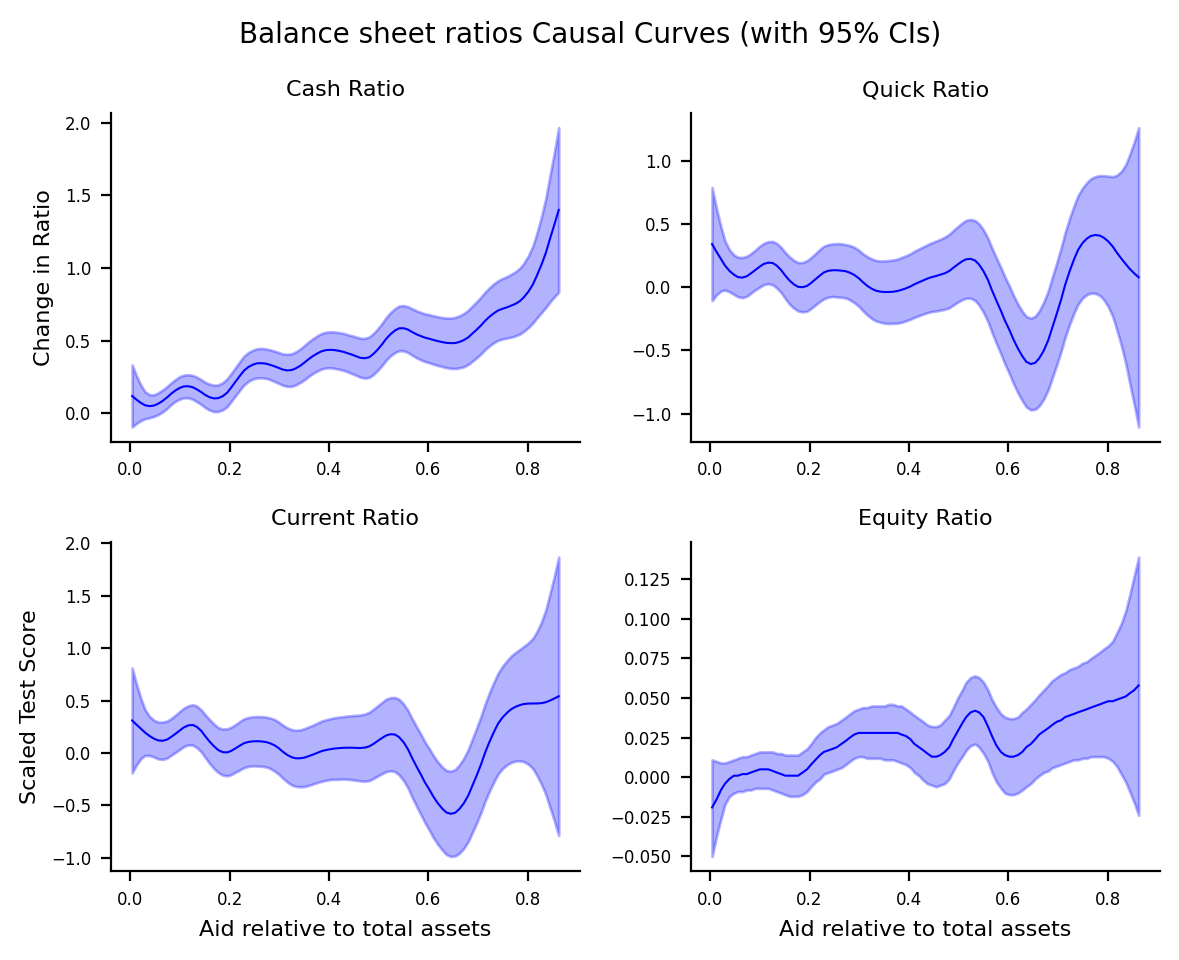

In [428]:
result_class = [['delta_cash_ratio_2021', 'delta_qick_ratio_2021'], ['delta_current_ratio_2021', 'delta_equity_ratio_2021']]

result_name = [['Cash Ratio', 'Quick Ratio'], ['Current Ratio', 'Equity Ratio']]

def plot_mean_and_CI(axs, i, j, treatment, mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    axs[i,j].fill_between(treatment, lb, ub, color=color_shading, alpha=0.3)
    # plot the mean on top
    axs[i,j].plot(treatment, mean, color_mean, linewidth=0.75)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [6, 5]

fig, axs = plt.subplots(2, 2)

for i in [0,1]:
    for j in [0,1]:

        # Plotting quantities
        treat = results_dict[result_class[i][j]]['Treatment']
        mean = results_dict[result_class[i][j]]['Causal_Dose_Response']
        lb = results_dict[result_class[i][j]]['Lower_CI']
        ub = results_dict[result_class[i][j]]['Upper_CI']
        plot_mean_and_CI(axs, i, j, treat, mean, lb, ub, color_mean='b', color_shading='b')

        # Labels
        axs[0,0].set_ylabel('Change in Ratio', fontsize = 8)
        axs[0,1].set_ylabel('')
        axs[1,0].set_ylabel('Scaled Test Score', fontsize = 8)
        axs[1,1].set_ylabel('')
        axs[1,0].set_xlabel('Aid relative to total assets', fontsize = 8)
        axs[1,1].set_xlabel('Aid relative to total assets', fontsize = 8)

        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)

        axs[i,j].spines["top"].set_visible(False)
        axs[i,j].spines["right"].set_visible(False)

        #axs[i,j].set_xlim(0, 2)
        #axs[i,j].set_ylim(0, 15)
        
        axs[i,j].tick_params(axis='both', which='major', labelsize=6)


fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Balance sheet ratios Causal Curves (with 95% CIs)", fontsize = 10)
fig.savefig('test_causal_curves.png', bbox_inches='tight', dpi = 300)

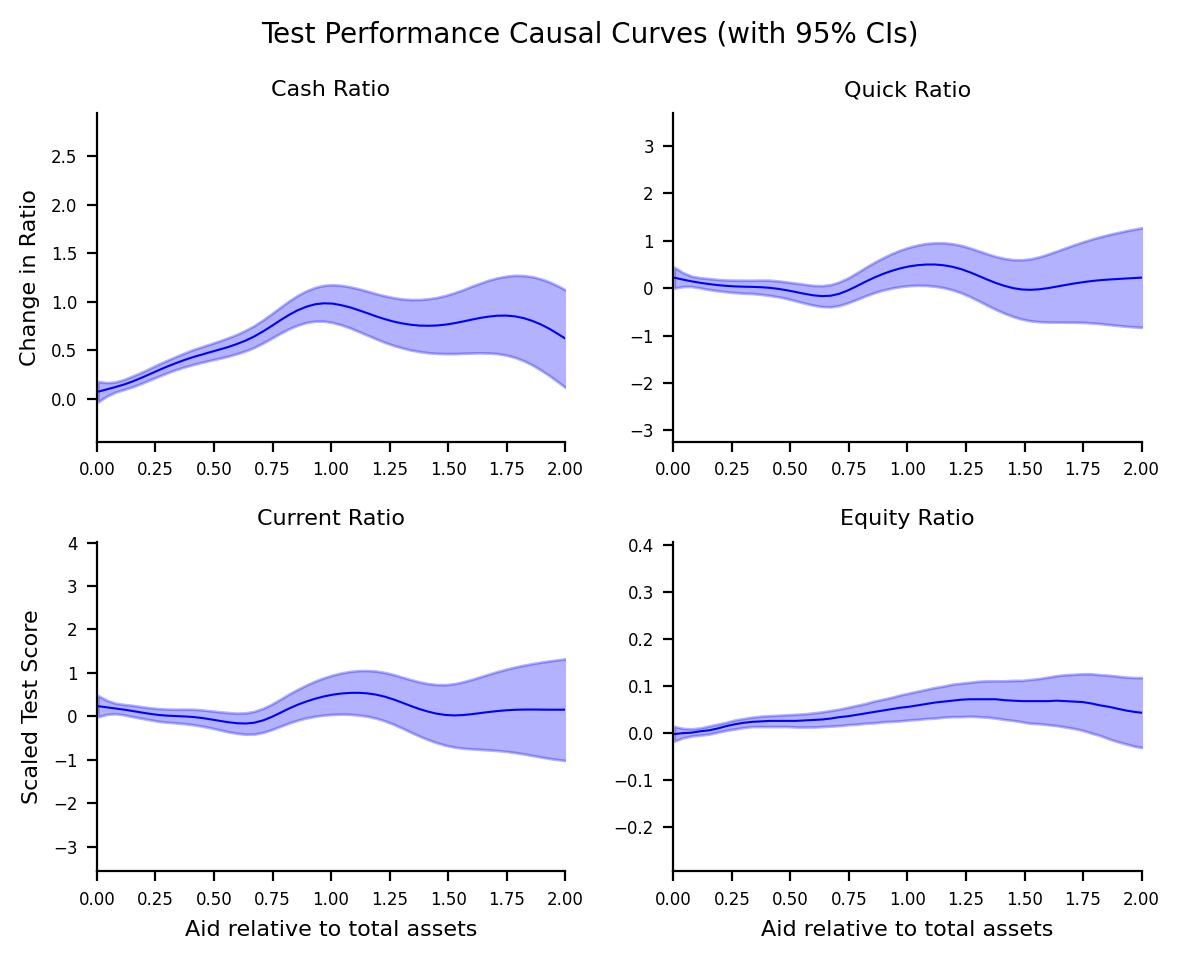

In [424]:
result_class = [['delta_cash_ratio_2021', 'delta_qick_ratio_2021'], ['delta_current_ratio_2021', 'delta_equity_ratio_2021']]

result_name = [['Cash Ratio', 'Quick Ratio'], ['Current Ratio', 'Equity Ratio']]

def plot_mean_and_CI(axs, i, j, treatment, mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    axs[i,j].fill_between(treatment, lb, ub, color=color_shading, alpha=0.3)
    # plot the mean on top
    axs[i,j].plot(treatment, mean, color_mean, linewidth=0.75)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [6, 5]

fig, axs = plt.subplots(2, 2)

for i in [0,1]:
    for j in [0,1]:

        # Plotting quantities
        treat = results_dict[result_class[i][j]]['Treatment']
        mean = results_dict[result_class[i][j]]['Causal_Dose_Response']
        lb = results_dict[result_class[i][j]]['Lower_CI']
        ub = results_dict[result_class[i][j]]['Upper_CI']
        plot_mean_and_CI(axs, i, j, treat, mean, lb, ub, color_mean='b', color_shading='b')

        # Labels
        axs[0,0].set_ylabel('Change in Ratio', fontsize = 8)
        axs[0,1].set_ylabel('')
        axs[1,0].set_ylabel('Scaled Test Score', fontsize = 8)
        axs[1,1].set_ylabel('')
        axs[1,0].set_xlabel('Aid relative to total assets', fontsize = 8)
        axs[1,1].set_xlabel('Aid relative to total assets', fontsize = 8)

        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)

        axs[i,j].spines["top"].set_visible(False)
        axs[i,j].spines["right"].set_visible(False)

        axs[i,j].set_xlim(0, 2)
        #axs[i,j].set_ylim(0, 15)
        
        axs[i,j].tick_params(axis='both', which='major', labelsize=6)


fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Test Performance Causal Curves (with 95% CIs)", fontsize = 10)
fig.savefig('test_causal_curves.png', bbox_inches='tight', dpi = 300)

In [388]:
# Dictionary to store model results
results_dict = {}

# Potential confounders
potential_confounders = list(condounders.columns)

# Try the MATH model
math_gps = TMLE_Regressor(random_seed=111,bandwidth=10)
#math_gps = GPS_Regressor()
math_gps.fit(
    T=final_df['aid_relative'], 
    X=final_df[potential_confounders], 
    y=final_df['delta_ratio']
)

results_dict['qick_ratio_2021'] = math_gps.calculate_CDRC()

In [389]:
results_dict['math_CDRC'] = math_gps.calculate_CDRC()
results_dict['reading_CDRC'] = math_gps.calculate_CDRC()
results_dict['block_CDRC'] = math_gps.calculate_CDRC()
results_dict['digit_CDRC'] = math_gps.calculate_CDRC()

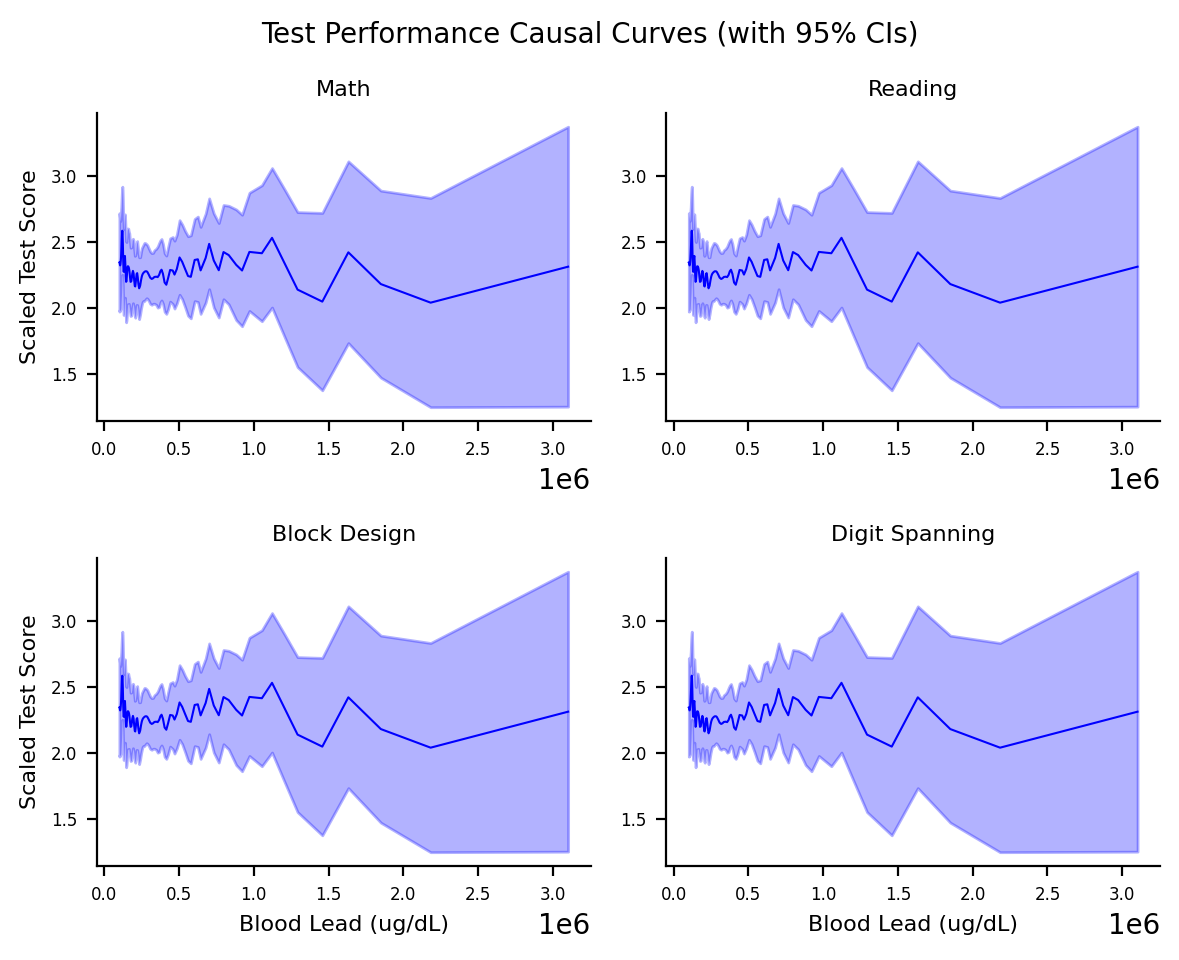

In [345]:
result_class = [['math_CDRC', 'reading_CDRC'], ['block_CDRC', 'digit_CDRC']]

result_name = [['Math', 'Reading'], ['Block Design', 'Digit Spanning']]

def plot_mean_and_CI(axs, i, j, treatment, mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    axs[i,j].fill_between(treatment, lb, ub, color=color_shading, alpha=0.3)
    # plot the mean on top
    axs[i,j].plot(treatment, mean, color_mean, linewidth=0.75)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [6, 5]

fig, axs = plt.subplots(2, 2)

for i in [0,1]:
    for j in [0,1]:

        # Plotting quantities
        treat = results_dict[result_class[i][j]]['Treatment']
        mean = results_dict[result_class[i][j]]['Causal_Dose_Response']
        lb = results_dict[result_class[i][j]]['Lower_CI']
        ub = results_dict[result_class[i][j]]['Upper_CI']
        plot_mean_and_CI(axs, i, j, treat, mean, lb, ub, color_mean='b', color_shading='b')

        # Labels
        axs[0,0].set_ylabel('Scaled Test Score', fontsize = 8)
        axs[0,1].set_ylabel('')
        axs[1,0].set_ylabel('Scaled Test Score', fontsize = 8)
        axs[1,1].set_ylabel('')
        axs[1,0].set_xlabel('Blood Lead (ug/dL)', fontsize = 8)
        axs[1,1].set_xlabel('Blood Lead (ug/dL)', fontsize = 8)

        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)

        axs[i,j].spines["top"].set_visible(False)
        axs[i,j].spines["right"].set_visible(False)

        #axs[i,j].set_xlim(0, 10)
        #axs[i,j].set_ylim(0, 15)
        
        axs[i,j].tick_params(axis='both', which='major', labelsize=6)


fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Test Performance Causal Curves (with 95% CIs)", fontsize = 10)
fig.savefig('test_causal_curves.png', bbox_inches='tight', dpi = 300)

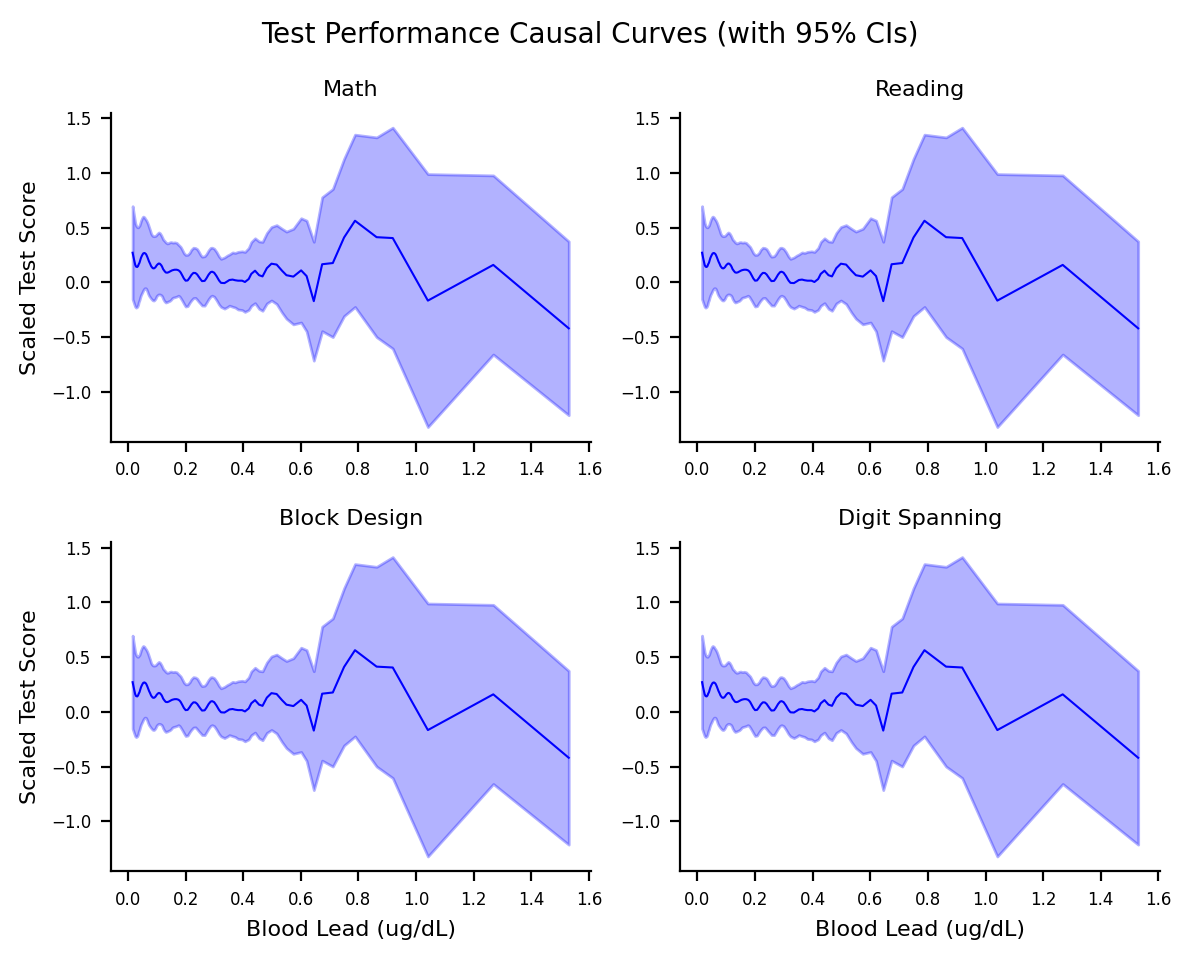

In [376]:
result_class = [['math_CDRC', 'reading_CDRC'], ['block_CDRC', 'digit_CDRC']]

result_name = [['Math', 'Reading'], ['Block Design', 'Digit Spanning']]

def plot_mean_and_CI(axs, i, j, treatment, mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    axs[i,j].fill_between(treatment, lb, ub, color=color_shading, alpha=0.3)
    # plot the mean on top
    axs[i,j].plot(treatment, mean, color_mean, linewidth=0.75)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [6, 5]

fig, axs = plt.subplots(2, 2)

for i in [0,1]:
    for j in [0,1]:

        # Plotting quantities
        treat = results_dict[result_class[i][j]]['Treatment']
        mean = results_dict[result_class[i][j]]['Causal_Dose_Response']
        lb = results_dict[result_class[i][j]]['Lower_CI']
        ub = results_dict[result_class[i][j]]['Upper_CI']
        plot_mean_and_CI(axs, i, j, treat, mean, lb, ub, color_mean='b', color_shading='b')

        # Labels
        axs[0,0].set_ylabel('Scaled Test Score', fontsize = 8)
        axs[0,1].set_ylabel('')
        axs[1,0].set_ylabel('Scaled Test Score', fontsize = 8)
        axs[1,1].set_ylabel('')
        axs[1,0].set_xlabel('Blood Lead (ug/dL)', fontsize = 8)
        axs[1,1].set_xlabel('Blood Lead (ug/dL)', fontsize = 8)

        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)

        axs[i,j].spines["top"].set_visible(False)
        axs[i,j].spines["right"].set_visible(False)

        #axs[i,j].set_xlim(0, 10)
        #axs[i,j].set_ylim(0, 15)
        
        axs[i,j].tick_params(axis='both', which='major', labelsize=6)


fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Test Performance Causal Curves (with 95% CIs)", fontsize = 10)
fig.savefig('test_causal_curves.png', bbox_inches='tight', dpi = 300)

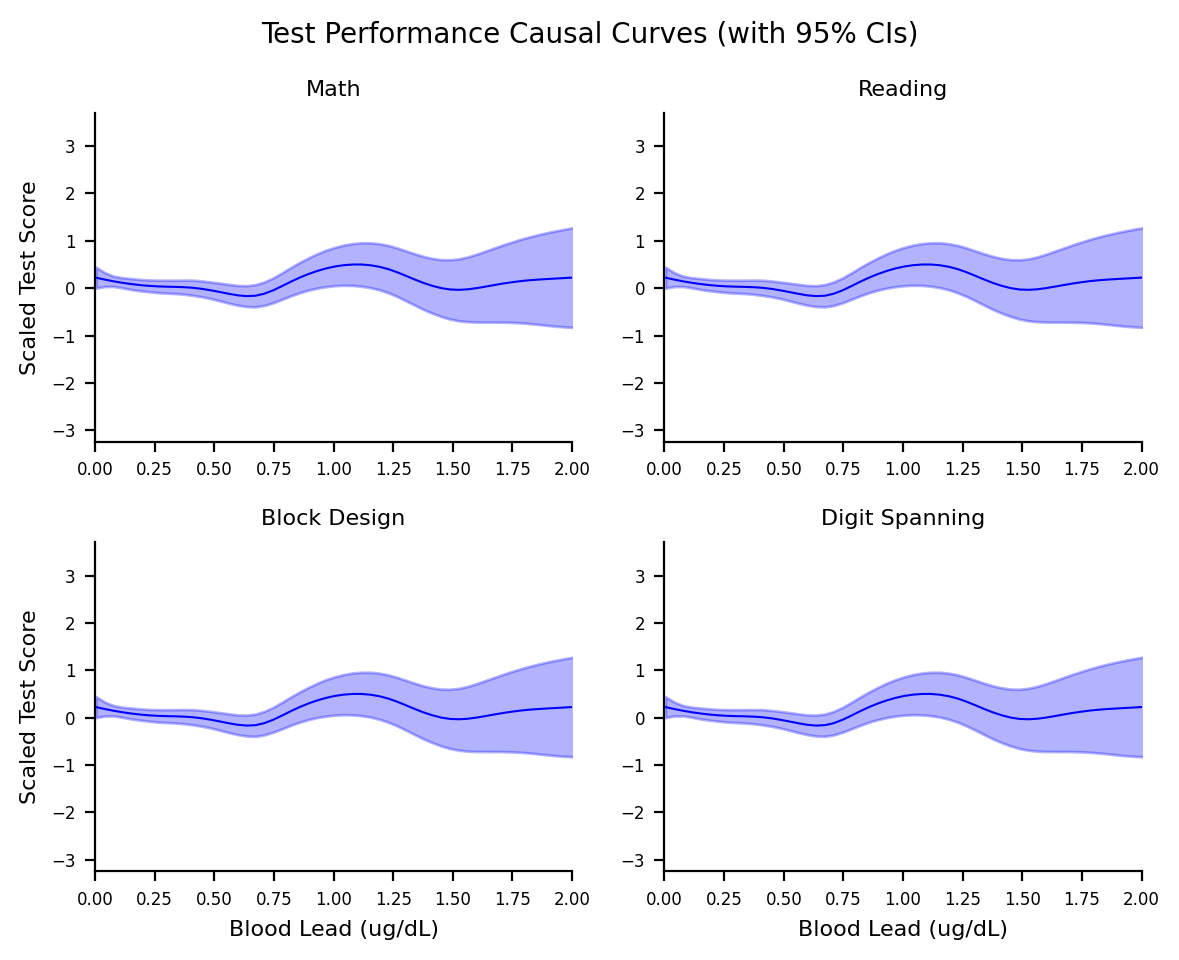

In [383]:
result_class = [['math_CDRC', 'reading_CDRC'], ['block_CDRC', 'digit_CDRC']]

result_name = [['Math', 'Reading'], ['Block Design', 'Digit Spanning']]

def plot_mean_and_CI(axs, i, j, treatment, mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    axs[i,j].fill_between(treatment, lb, ub, color=color_shading, alpha=0.3)
    # plot the mean on top
    axs[i,j].plot(treatment, mean, color_mean, linewidth=0.75)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [6, 5]

fig, axs = plt.subplots(2, 2)

for i in [0,1]:
    for j in [0,1]:

        # Plotting quantities
        treat = results_dict[result_class[i][j]]['Treatment']
        mean = results_dict[result_class[i][j]]['Causal_Dose_Response']
        lb = results_dict[result_class[i][j]]['Lower_CI']
        ub = results_dict[result_class[i][j]]['Upper_CI']
        plot_mean_and_CI(axs, i, j, treat, mean, lb, ub, color_mean='b', color_shading='b')

        # Labels
        axs[0,0].set_ylabel('Scaled Test Score', fontsize = 8)
        axs[0,1].set_ylabel('')
        axs[1,0].set_ylabel('Scaled Test Score', fontsize = 8)
        axs[1,1].set_ylabel('')
        axs[1,0].set_xlabel('Blood Lead (ug/dL)', fontsize = 8)
        axs[1,1].set_xlabel('Blood Lead (ug/dL)', fontsize = 8)

        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)

        axs[i,j].spines["top"].set_visible(False)
        axs[i,j].spines["right"].set_visible(False)

        axs[i,j].set_xlim(0, 2)
        #axs[i,j].set_ylim(0, 15)
        
        axs[i,j].tick_params(axis='both', which='major', labelsize=6)


fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Test Performance Causal Curves (with 95% CIs)", fontsize = 10)
fig.savefig('test_causal_curves.png', bbox_inches='tight', dpi = 300)

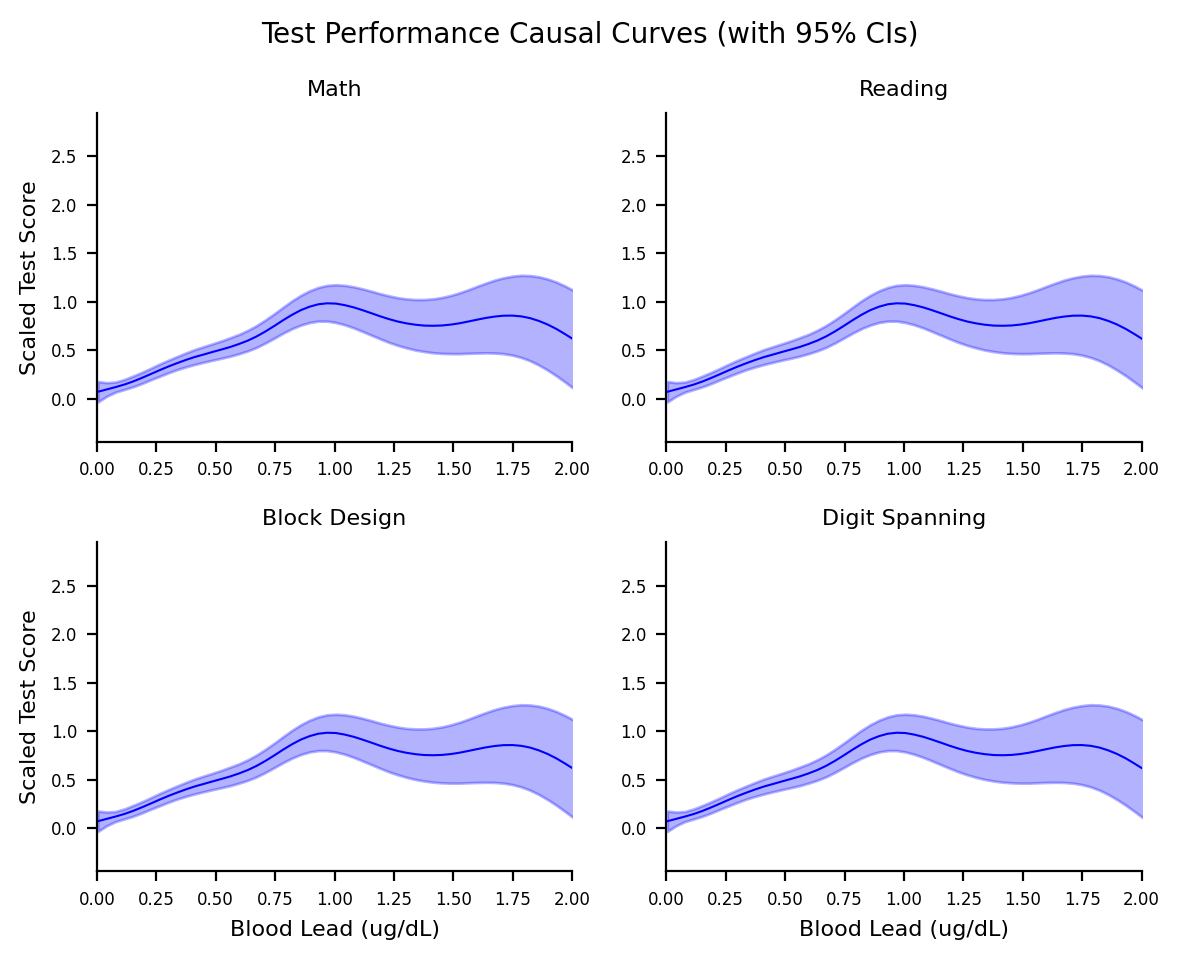

In [390]:
result_class = [['math_CDRC', 'reading_CDRC'], ['block_CDRC', 'digit_CDRC']]

result_name = [['Math', 'Reading'], ['Block Design', 'Digit Spanning']]

def plot_mean_and_CI(axs, i, j, treatment, mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    axs[i,j].fill_between(treatment, lb, ub, color=color_shading, alpha=0.3)
    # plot the mean on top
    axs[i,j].plot(treatment, mean, color_mean, linewidth=0.75)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [6, 5]

fig, axs = plt.subplots(2, 2)

for i in [0,1]:
    for j in [0,1]:

        # Plotting quantities
        treat = results_dict[result_class[i][j]]['Treatment']
        mean = results_dict[result_class[i][j]]['Causal_Dose_Response']
        lb = results_dict[result_class[i][j]]['Lower_CI']
        ub = results_dict[result_class[i][j]]['Upper_CI']
        plot_mean_and_CI(axs, i, j, treat, mean, lb, ub, color_mean='b', color_shading='b')

        # Labels
        axs[0,0].set_ylabel('Scaled Test Score', fontsize = 8)
        axs[0,1].set_ylabel('')
        axs[1,0].set_ylabel('Scaled Test Score', fontsize = 8)
        axs[1,1].set_ylabel('')
        axs[1,0].set_xlabel('Blood Lead (ug/dL)', fontsize = 8)
        axs[1,1].set_xlabel('Blood Lead (ug/dL)', fontsize = 8)

        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)

        axs[i,j].spines["top"].set_visible(False)
        axs[i,j].spines["right"].set_visible(False)

        axs[i,j].set_xlim(0, 2)
        #axs[i,j].set_ylim(0, 15)
        
        axs[i,j].tick_params(axis='both', which='major', labelsize=6)


fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Test Performance Causal Curves (with 95% CIs)", fontsize = 10)
fig.savefig('test_causal_curves.png', bbox_inches='tight', dpi = 300)

In [ ]:
# Dictionary to store model results
results_dict = {}

# Potential confounders
potential_confounders = list(pd.get_dummies(df["industry_1"], prefix='industry', drop_first=True).columns)

# Try the MATH model
math_gps = GPS_Regressor(gps_family='normal', lower_grid_constraint = 0.0, upper_grid_constraint = 0.99, n_splines = 5, verbose=False)
math_gps.fit(
    T=df['BLL'], 
    X=df[potential_confounders], 
    y=df['Math']
)

results_dict['math_CDRC'] = math_gps.calculate_CDRC()


# Try the READING model
reading_gps = GPS_Regressor(gps_family='normal', lower_grid_constraint = 0.0, upper_grid_constraint = 0.99, n_splines = 5, verbose=False)

reading_gps.fit(
    T=df['BLL'], 
    X=df[potential_confounders],  
    y=df['Reading']
)

results_dict['reading_CDRC'] = reading_gps.calculate_CDRC()



# Try the Block model
block_gps = GPS_Regressor(gps_family='normal', lower_grid_constraint = 0.0, upper_grid_constraint = 0.99, n_splines = 5, verbose=False)

block_gps.fit(
    T=df['BLL'], 
    X=df[potential_confounders],  
    y=df['Block']
)

results_dict['block_CDRC'] = block_gps.calculate_CDRC()



# Try the Digit model
digit_gps = GPS_Regressor(gps_family='normal', lower_grid_constraint = 0.0, upper_grid_constraint = 0.99, n_splines = 5, verbose=False)

digit_gps.fit(
    T=df['BLL'], 
    X=df[potential_confounders],  
    y=df['Digit']
)

results_dict['digit_CDRC'] = digit_gps.calculate_CDRC()